<div style="display:flex; justify-content:center; align-items:center;">
    <center><img src="https://www.edinburghairport.com/_next/static/media/logo.05c847c5.svg" style="height:80px;"></center>
    &nbsp;&nbsp;&nbsp;<b>X</b>&nbsp;&nbsp;&nbsp;
    <center><img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Logo_of_the_Pantheon-Sorbonne_University_in_Paris.png" style="height:90px;"></center>
</div>

<br>
<hr style="border-width:2px;border-color:#FFFFFF"><br>
<center><h1><b>Project : Prediction of gas consumption over 3 months</b></h1></center>
<hr style="border-width:2px;border-color:#FFFFFF"><br>
<center> <h3>By Hella Bouhadda, Charlotte Cegarra</h3> </center>
<center> <h5>Master 1 Econometrics-Statistics 2023-2024</h5> </center>
<center> <h5>University Paris 1 Panthéon-Sorbonne</h5> </center>

## Table of Contents

I. **Objective**
   - Definition of project objectives

II. **Data**

    Data loading

III. **Exploratory Data Analysis (EDA)**

    a. Observation

    b. Index

    c. Type handling

    d. Removal of COVID part

    e. Duplicate management

    f. Missing values treatment

    g. Zeros treatment

    h. Extreme values

    i. Date visualization

    j. Correlation

    k. Interpolation

    l. Descriptive and contextual analysis

IV. **Stationarity**

    a. ACF (Auto-correlation function)

    b. PACF (Partial auto-correlation function)

    c. Tests :
       i. Dickey-Fuller
       
       ii. Philipos-Perron

       iii. KPSS

    d. Decomposition of the Time Series

V. **Models**
    a. Kalman Filter

    b. XGBoost

    c. ADL (Autoregressive Distributed Lag)
    
    e. Machine Learning

VI. **Performance**

VII. **Final Predictions**




<font color="red"><h2>I. Objective</b></h2></font>

The aim of this project is to develop an accurate forecasting model to estimate the gas consumption of Edinburgh Airport at 30-minute intervals over a three-month period. Given that Edinburgh Airport is currently experiencing an increase in gas prices, like the rest of the UK, it is crucial to have reliable forecasts to better manage energy resources and optimize costs.

To achieve this goal, the project will focus on the use of advanced time series forecasting techniques, such as ADL models, Xgboost, LSTM, and the Kalman filter. These methods will be tested and validated to ensure accuracy above 85%, which is essential for providing robust and actionable estimates.

By accurately anticipating gas consumption, the airport will be able to better plan its gas purchases, minimize waste, and potentially reduce energy expenses, while ensuring a constant and adequate supply for its operational needs.

Additionally, with forecasts at 30-minute intervals, the airport will be able to react proactively to real-time consumption changes, thereby optimizing energy efficiency and resource management.

Therefore, this project aims to provide a powerful and accurate tool for the energy management of Edinburgh Airport, contributing to more efficient resource utilization and significant cost reduction in this period of rising gas prices.



<font color="red"><h2>II. Data </b></h2></font>

In [747]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.api import AutoReg
from arch.unitroot import PhillipsPerron
from scipy.stats import kendalltau
from tabulate import tabulate
from pykalman import KalmanFilter
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.tsa.api as smt


In [748]:
df = pd.read_csv("edi_gas_data.csv")
#df=pd.read_csv("C:\\Users\\lalab\\Downloads\\edi_gas_data.csv", sep=',')
#df=pd.read_csv("C:\\Users\\33615\\Documents\\M1 S2\\Projet Python\\Data\\edi_gas_data.csv", sep=',')


To develop a gas consumption forecasting model for Edinburgh Airport, we have access to a rich and diverse dataset. This dataset includes temporal and weather information, as well as airport activity indicators. Here is a detailed description of each column present in our dataset.

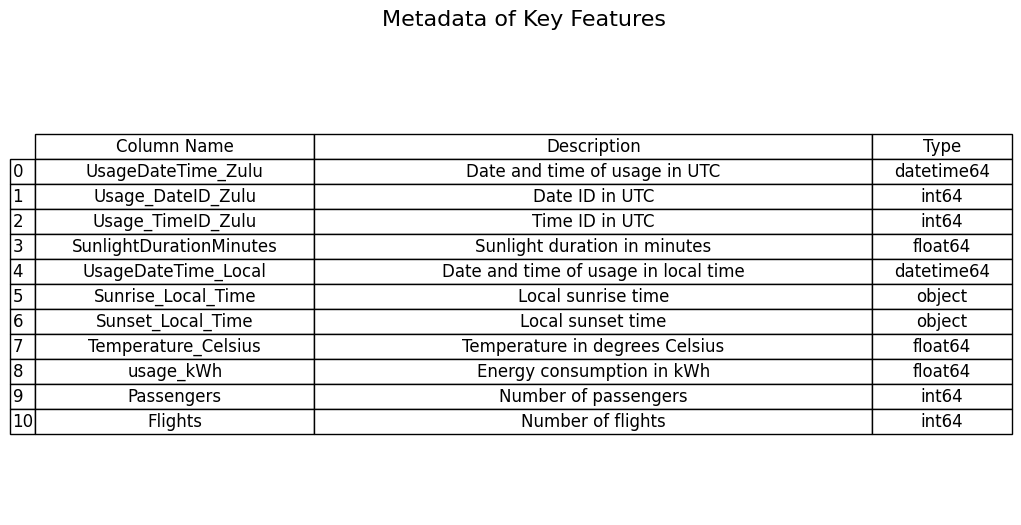

In [749]:

data = {
    'Column Name': ['UsageDateTime_Zulu', 'Usage_DateID_Zulu', 'Usage_TimeID_Zulu', 'SunlightDurationMinutes', 'UsageDateTime_Local', 'Sunrise_Local_Time', 'Sunset_Local_Time', 'Temperature_Celsius', 'usage_kWh', 'Passengers', 'Flights'],
    'Description': ['Date and time of usage in UTC', 'Date ID in UTC', 'Time ID in UTC', 'Sunlight duration in minutes', 'Date and time of usage in local time', 'Local sunrise time', 'Local sunset time', 'Temperature in degrees Celsius', 'Energy consumption in kWh', 'Number of passengers', 'Number of flights'],
    'Type': ['datetime64', 'int64', 'int64', 'float64', 'datetime64', 'object', 'object', 'float64', 'float64', 'int64', 'int64']
}

df_metadata = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

plt.title('Metadata of Key Features', fontsize=16, pad=20)

tbl = table(ax, df_metadata, loc='center', cellLoc='center', colWidths=[0.2, 0.4, 0.1])

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

tbl.scale(1.5, 1.5)

plt.show()


\
This table allows us to have an overview of the different variables available for our analysis. The `UsageDateTime_Zulu` column gives us the time reference in UTC, essential for synchronizing the data. Weather information such as `SunlightDurationMinutes` and `Temperature_Celsius` will help us understand the impact of climatic conditions on gas consumption. The `Passengers` and `Flights` columns provide indicators of airport activity, which is crucial for modeling variations in energy consumption.

With this database, we are well equipped to explore the relationships between different variables and gas consumption. The next step will be to process and prepare these data for analysis. This will include tasks such as handling missing values, converting date and time formats, and exploring the correlations between different variables.

<font color="red"><h2>III. Exploratory Data Analysis (EDA)</b></h2></font>





### Observation



* When we use df.head(), we are displaying the first few rows of our DataFrame. This helps us quickly inspect the structure and contents of our data, allowing us to understand the variables and their initial values.

In [750]:
df.head()

,Unnamed: 0,UsageDateTime_Zulu,Usage_DateID_Zulu,Usage_TimeID_Zulu,SunlightDurationMinutes,UsageDateTime_Local,Sunrise_Local_Time,Sunset_Local_Time,Temperature_Celsius,usage_kWh,Passengers,Flights
0,0,01/03/2020 03:00,20200301,25959,644.54,01/03/2020 03:00,07:02:43,17:47:16,4.3,1009.75,0,0
1,1,01/03/2020 03:30,20200301,32959,644.54,01/03/2020 03:30,07:02:43,17:47:16,4.2,836.88,0,0
2,2,01/03/2020 04:00,20200301,35959,644.54,01/03/2020 04:00,07:02:43,17:47:16,4.2,1112.77,0,0
3,3,01/03/2020 04:30,20200301,42959,644.54,01/03/2020 04:30,07:02:43,17:47:16,3.7,1423.93,0,0
4,4,01/03/2020 05:00,20200301,45959,644.54,01/03/2020 05:00,07:02:43,17:47:16,3.7,1370.82,0,0


The table output shows the first few rows of our DataFrame with columns such as automatic row index, dates and times in UTC and local time, sunshine duration in minutes, temperature in degrees Celsius, energy consumption in kilowatt-hours, and the number of passengers and flights at the airport. The data shows that for the first records, the `Passengers` and `Flights` columns have zero values, indicating that there were no passengers or flights at those specific times. Energy consumption varies, as does temperature, while sunshine duration remains constant for that date. This overview helps us to understand the available variables and their initial distribution.

In [751]:
df.tail()

,Unnamed: 0,UsageDateTime_Zulu,Usage_DateID_Zulu,Usage_TimeID_Zulu,SunlightDurationMinutes,UsageDateTime_Local,Sunrise_Local_Time,Sunset_Local_Time,Temperature_Celsius,usage_kWh,Passengers,Flights
60195,60195,11/02/2024 22:00,20240211,215959,559.97,11/02/2024 22:00,07:47:00,17:06:58,4.7,1493.26,683,6
60196,60196,11/02/2024 22:30,20240211,222959,559.97,11/02/2024 22:30,07:47:00,17:06:58,3.9,1317.08,461,4
60197,60197,11/02/2024 23:00,20240211,225959,559.97,11/02/2024 23:00,07:47:00,17:06:58,3.9,1337.79,778,6
60198,60198,11/02/2024 23:30,20240211,232959,559.97,11/02/2024 23:30,07:47:00,17:06:58,3.7,1364.61,1462,9
60199,60199,12/02/2024 00:00,20240211,235959,559.97,12/02/2024 00:00,07:47:00,17:06:58,3.7,1122.58,0,0


Conversely, using df.tail(), we can observe the last few rows of the DataFrame, where the values in the Passengers and Flights columns show increased airport activity, particularly before midnight.

### Index



*  What we do here is remove the first column from the DataFrame using `df.drop(df.columns[0], axis=1)`. This operation allows us to remove a column that might be an unnamed index or an undesirable column for our analysis. In this case, we remove the first column which appears to be an unnamed automatic index.


In [752]:
df = df.drop(df.columns[0], axis=1)

This action allows us to check that the column has been removed and to ensure that the data is in a suitable format for our analysis. By removing the first column from the DataFrame, which appears to be an unnamed automatic index, we simplify the structure of the data. This is particularly useful for ensuring that our data is well prepared before we use it, for example to have dates on the x-axis in graphs or other analysis processes.

*   Next, we use `df.info()` to get a full summary of the structure of the DataFrame, including details such as the total number of entries, the names of the columns, the number of non-zero values in each column and the data type of each column. This command allows us to quickly understand the size of the data, identify columns with missing values and check that the data types are appropriate for each variable, which is essential for ensuring the quality and reliability of the subsequent analysis.



In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60200 entries, 0 to 60199
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UsageDateTime_Zulu       60200 non-null  object 
 1   Usage_DateID_Zulu        60200 non-null  int64  
 2   Usage_TimeID_Zulu        60200 non-null  int64  
 3   SunlightDurationMinutes  60200 non-null  float64
 4   UsageDateTime_Local      60200 non-null  object 
 5   Sunrise_Local_Time       60200 non-null  object 
 6   Sunset_Local_Time        60200 non-null  object 
 7   Temperature_Celsius      60054 non-null  float64
 8   usage_kWh                60200 non-null  float64
 9   Passengers               60200 non-null  int64  
 10  Flights                  60200 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 5.1+ MB


Analysis of the results reveals that the DataFrame consists of 60200 entries spread over 11 columns. These columns contain mainly numeric data (float64 and int64), as well as object data. We note that the `Temperature_Celsius` column has some missing values, with a total of 60054 non-zero entries, while the other columns contain no missing data. This initial inspection is crucial as it allows us to detect any problems with data type and missing values, which will help us to process the data correctly for later analysis.

### Processing types



*   Taking into account data types is essential in any data analysis. Correct data types guarantee the consistency and accuracy of operations performed on data. For example, when calculating or comparing dates, it is crucial that the values are interpreted correctly as objects of type date. Similarly, when using data in graphs or other visualisations, the correct data types facilitate the correct processing and display of information.



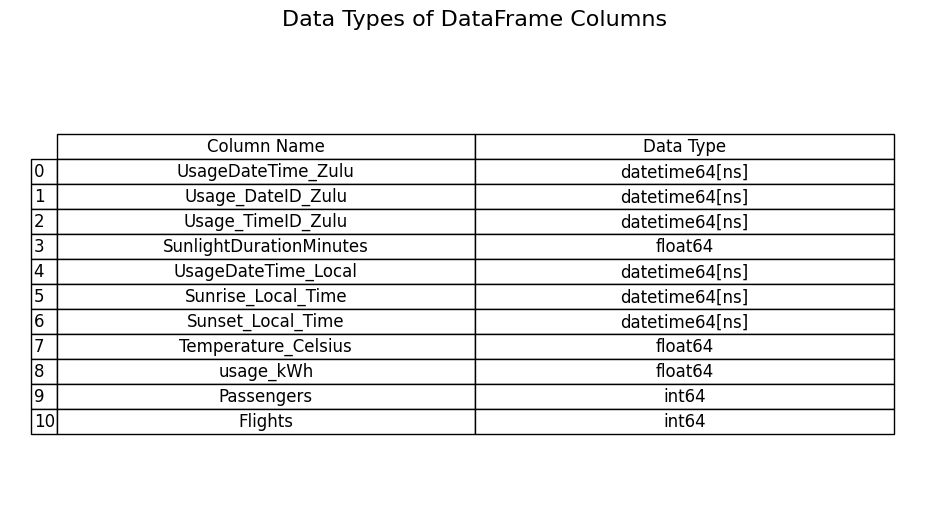

In [754]:
date_format = "%d/%m/%Y %H:%M"
df['UsageDateTime_Zulu'] = pd.to_datetime(df['UsageDateTime_Zulu'], format=date_format)

date_format2 = "%Y%m%d"
df["Usage_DateID_Zulu"] = pd.to_datetime(df['Usage_DateID_Zulu'], format=date_format2)

date_format3 = "%H%M%S"
df["Usage_TimeID_Zulu"] = pd.to_datetime(df['Usage_TimeID_Zulu'], format=date_format3)

date_format4 = "%d/%m/%Y %H:%M"
df["UsageDateTime_Local"] = pd.to_datetime(df['UsageDateTime_Local'], format=date_format4)

date_format5 = "%H:%M:%S"
df["Sunrise_Local_Time"] = pd.to_datetime(df['Sunrise_Local_Time'], format=date_format5)
df["Sunset_Local_Time"] = pd.to_datetime(df['Sunset_Local_Time'], format=date_format5)

df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Column Name', 'Data Type']

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

plt.title('Data Types of DataFrame Columns', fontsize=16, pad=20)

tbl = table(ax, df_dtypes, loc='center', cellLoc='center', colWidths=[0.3, 0.3])
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.5, 1.5)

plt.show()


In this step, we adjust the format of the dates in our DataFrame. We convert the columns containing date information so that they are correctly recognised as datetime objects by Python. By defining the format of each date column, we ensure that Python can interpret these values appropriately. This change allows us to work accurately with datetime data in our subsequent analyses.

### Removal of the COVID part



*   Removing some of the data that is not relevant to our analysis is common practice, and in the context of the COVID-19 pandemic, it becomes essential. The pandemic has had a significant impact on many sectors, including airport operations. Containment measures, travel restrictions and behavioural changes have led to significant fluctuations in air traffic, passenger numbers and other variables related to airport operations. By setting a start and end period corresponding to the emergence and evolution of the pandemic, we can focus our analysis on the period when the effects of COVID-19 were most significant. This allows us to better understand the impact of the pandemic on our data and to make more informed decisions.


In [755]:
debutcov = pd.to_datetime('2021-01-01')
fincov = pd.to_datetime('2024-02-11')

df= df[(df['UsageDateTime_Zulu'] >= debutcov) & (df['UsageDateTime_Zulu'] <= fincov)]


In the code provided, we define a start period (debutcov) of 1 January 2021, when the pandemic had already begun to have a significant global impact, and an end period (fincov) of 11 February 2024. We then use these criteria to filter our df DataFrame, retaining only the data corresponding to this specific period when the effects of COVID-19 were most pronounced. This allows us to focus our analysis on the crucial period of the pandemic and better understand its implications for our data. By displaying the filtered DataFrame using print(df), we ensure that our analysis focuses only on the data relevant to studying the impacts of COVID-19.

### Duplicate Processing



*   We will now check our data for duplicates. This is essential to ensure the integrity and accuracy of our analysis. The presence of duplicates could distort our results by introducing redundancies into our data, which could lead to erroneous conclusions. By identifying and removing duplicates, we ensure that each entry in our dataset is unique and representative, allowing us to obtain more reliable results in our subsequent analysis.


In [756]:
def check_duplicates(df):
    number_of_duplicates = df.duplicated().sum()

    if number_of_duplicates == 0:
        print("There are no duplicates in the DataFrame.")
    else:
        print(f"There are {number_of_duplicates} duplicates in the DataFrame.")
        df.drop_duplicates(inplace=True)
        print("Duplicates have been removed.")

check_duplicates(df)



There are no duplicates in the DataFrame.


At the moment, having run the duplicate check function on our current dataset, there are no duplicates detected. However, it is important to note that data can change over time. If new entries are added to our dataset, or if changes are made to existing data, all we need to do is run this function again on the new DataFrame to check for duplicates. This will ensure that our dataset remains clean and consistent, which is essential for accurate and reliable analyses.

### Treatment of missing values



*   We will now move on to the stage of dealing with the missing values in our data. It is crucial to deal with these missing values because they can distort our analyses and lead to erroneous conclusions. Missing data can be the result of various factors, such as data entry errors, technical problems during data collection or simply unrecorded values for certain observations. By leaving them as they are, we run the risk of distorting our results and obtaining an incomplete or biased picture of the situation. By dealing with missing values appropriately, we can minimise this negative impact and obtain more accurate and meaningful results in our subsequent analysis.



In [757]:
df.isna().mean().to_frame("Percentage of missing values")

,Percentage of missing values
UsageDateTime_Zulu,0.000000
Usage_DateID_Zulu,0.000000
Usage_TimeID_Zulu,0.000000
SunlightDurationMinutes,0.000000
UsageDateTime_Local,0.000000
Sunrise_Local_Time,0.000000
Sunset_Local_Time,0.000000
Temperature_Celsius,0.002545
usage_kWh,0.000000
Passengers,0.000000


The percentage of missing values in our data is extremely low, with most columns having a percentage of missing values of zero. However, the ‘Temperature_Celsius’ column has an even lower percentage of missing values, at only 0.0025%. This indicates that a tiny fraction of the observations in this column are missing data on the temperature in degrees Celsius. Although this percentage is very low, it is important to take it into account during our analysis to ensure that we treat these missing values appropriately and that our results remain reliable and accurate.

In [758]:
temperature_description = df["Temperature_Celsius"].describe()


print("Descriptive Statistics for Temperature (Celsius)\n")
temperature_description_df = pd.DataFrame(temperature_description)
temperature_description_df.rename(columns={"Temperature_Celsius": "Value"}, inplace=True)
print(temperature_description_df.to_markdown())

Descriptive Statistics for Temperature (Celsius)

|       |       Value |
|:------|------------:|
| count | 48210       |
| mean  |     9.73593 |
| std   |     5.60429 |
| min   |   -12.6     |
| 25%   |     5.8     |
| 50%   |     9.8     |
| 75%   |    13.9     |
| max   |    30.7     |


The results of the statistical description for the ‘Temperature_Celsius’ column indicate that the mean (9.74) and the median (9.80) are fairly close to each other. This proximity suggests that our data distribution is relatively symmetrical around the mean, which is often the case for a normal distribution. We will therefore impute the missing values by the median, as this seems to be a reasonable approach. This will allow us to minimise the impact of extreme values on our imputation while maintaining the representativeness of the central tendency of our data.

In [759]:
df["Temperature_Celsius"] = df["Temperature_Celsius"].fillna(df["Temperature_Celsius"].median())
df.isna().mean().to_frame("Percentage of missing values")

,Percentage of missing values
UsageDateTime_Zulu,0.0
Usage_DateID_Zulu,0.0
Usage_TimeID_Zulu,0.0
SunlightDurationMinutes,0.0
UsageDateTime_Local,0.0
Sunrise_Local_Time,0.0
Sunset_Local_Time,0.0
Temperature_Celsius,0.0
usage_kWh,0.0
Passengers,0.0


### Handling zeros



*   In this section, we will count the number of zeros in our data. This is necessary because zeros can have different meanings depending on the context. Some zeros may be real values, while others may indicate missing data or incorrect values. Counting the number of zeros will enable us to assess the extent of this phenomenon and decide how to deal with them appropriately in the future.


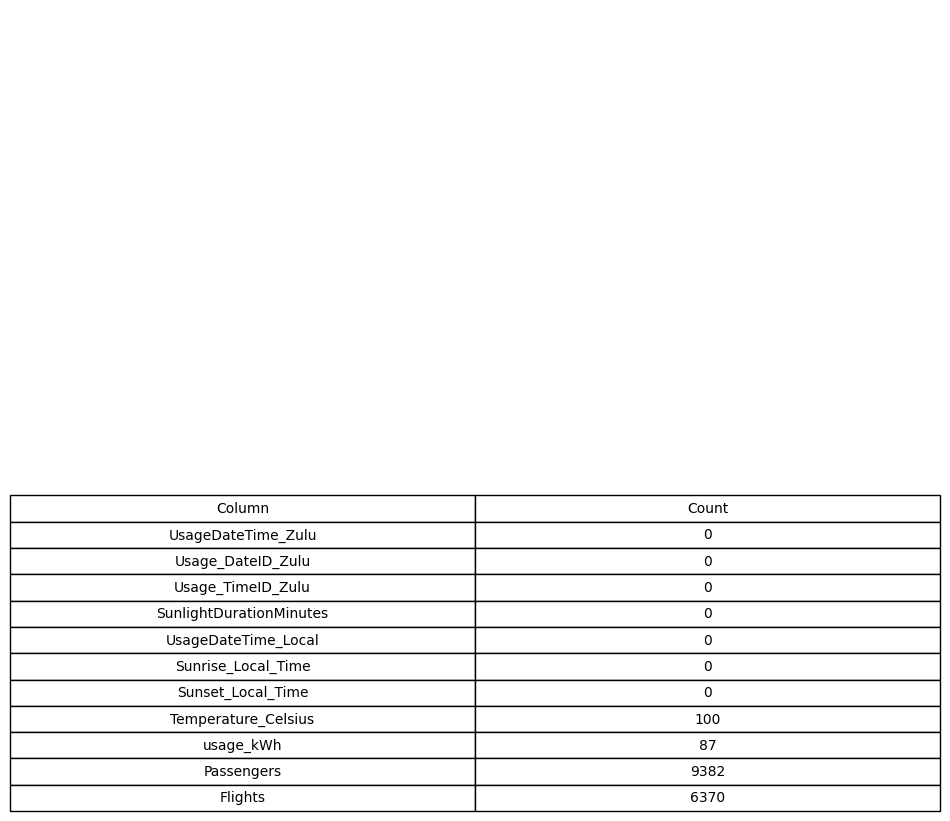

In [760]:
comptage_zeros = (df == 0).sum()

zeros_df = comptage_zeros.to_frame().reset_index()
zeros_df.columns = ['Column', 'Count']

plt.figure(figsize=(8, 6))
table = plt.table(cellText=zeros_df.values,
                  colLabels=zeros_df.columns,
                  cellLoc='center',
                  loc='bottom')  # Titre en bas
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.axis('off')

plt.subplots_adjust(top=0.92)  #

plt.show()


Then, after counting the zeros, we see that some columns have a significant number of zeros. For example, the ‘Passengers’ column has 9382 zeros and the ‘Flights’ column has 6370 zeros. However, it is important to note that some of these zeros may represent real values, for example, a flight without passengers or a day without a flight. Therefore, not all zeros are necessarily problematic. However, we will need to look more closely at cases where the zeros seem unusual or inappropriate, such as those in the ‘Temperature_Celsius’ and ‘usage_kWh’ columns. These zeros may require special attention and will be dealt with at a later date, for example by using interpolation techniques to estimate missing or incorrect values.

### Outliers



*   Outliers can distort our statistical results by influencing means, standard deviations and other measures of central tendency and dispersion. It is therefore essential to identify them and deal with them appropriately to ensure the accuracy and reliability of our analyses. By eliminating or correcting outliers, we can obtain a more accurate and representative picture of our dataset, enabling us to obtain more robust and meaningful results.


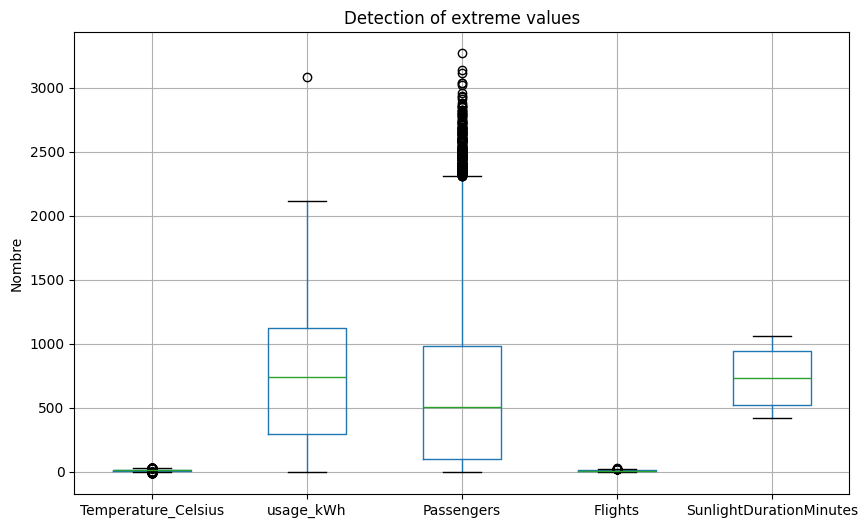

In [761]:
df_outliers=df[['Temperature_Celsius', 'usage_kWh', "Passengers", "Flights", "SunlightDurationMinutes"]]
plt.figure(figsize=(10, 6))
df_outliers.boxplot()
plt.title('Detection of extreme values')
plt.ylabel('Nombre')
plt.show()


Having carried out the check, we can see that there are a large number of outliers for the ‘Passengers’ column. However, deleting these outliers could result in a significant loss of information, as they represent legitimate observations, even if they are outside the usual range. On the other hand, for the ‘usage_kWh’ column, we have identified a single outlier which, because of its significant deviation from the other values, could potentially pose a problem for our data. In this case, treating this outlier by replacing it with the second highest value seems to be a better approach, as it allows us to correct this outlier without causing a significant loss of information in our data.

In [762]:
df_sorted = df_outliers.sort_values(by='usage_kWh', ascending=False)

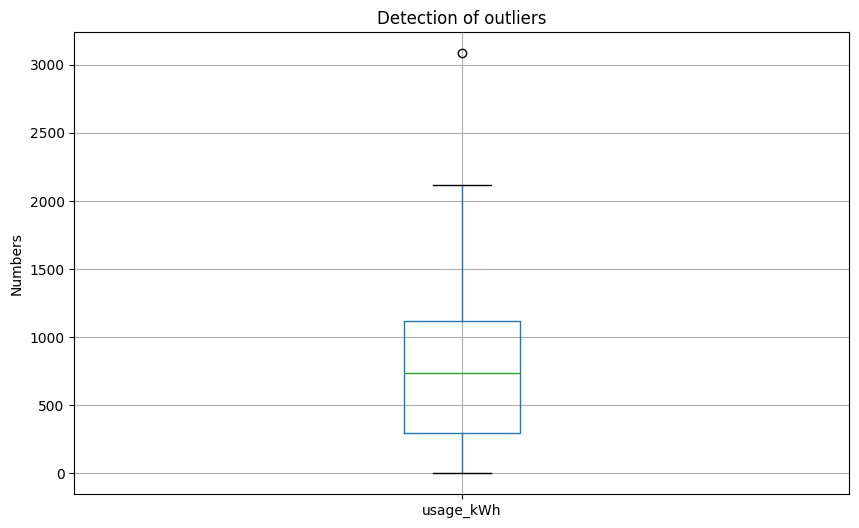

In [763]:

max_usage_kWh_index = df_outliers['usage_kWh'].idxmax()


df1 = df_outliers.sort_values(by='usage_kWh', ascending=False)

second_highest_usage_kWh = df1.iloc[1]['usage_kWh']


df1.loc[max_usage_kWh_index, 'usage_kWh'] = second_highest_usage_kWh



df1= df.sort_values(by='usage_kWh', ascending=False)
df1.head()

df1=df1[[ 'usage_kWh']]
plt.figure(figsize=(10, 6))
df1.boxplot()
plt.title('Detection of outliers')
plt.ylabel('Numbers')
plt.show()

### Viewing variables by date

We're going to visualize our variables in relation to the date in order to observe their variations.

* Sunlight diration minutes visualization :

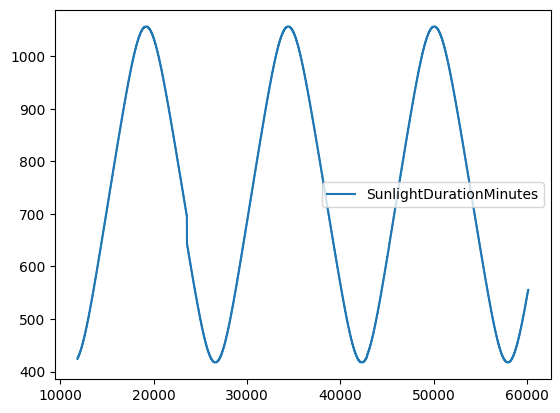

In [764]:
df[['SunlightDurationMinutes']].plot(
    subplots = True,
    sharex = True,
    sharey = False)

plt.show()

The sunlight duration variable exhibits clear seasonality, peaking during the summer months and decreasing during the winter months. This seasonal pattern is due to the natural variations in daylight hours throughout the year. In summer, days are longer with more sunlight, leading to increased sunlight duration. In contrast, winter days are shorter with less sunlight, resulting in decreased sunlight duration.

* Passengers and Flights vusalizations :

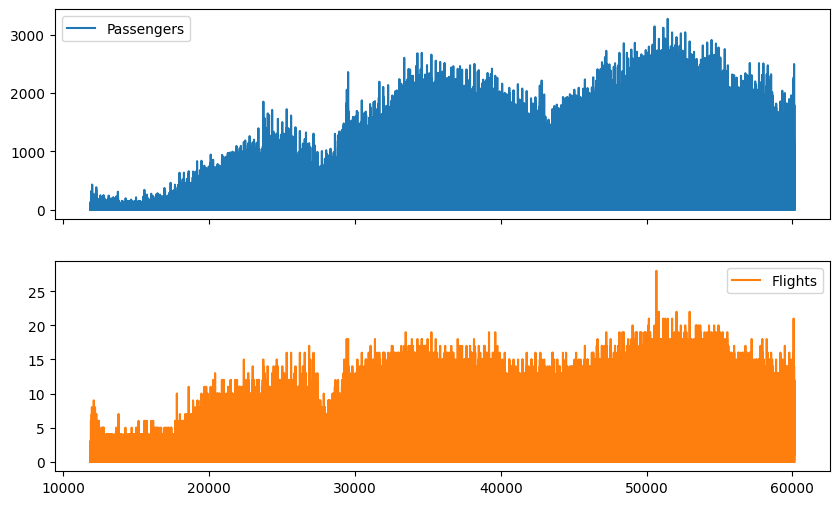

In [765]:
df[["Passengers", "Flights"]].plot(
    subplots=True,
    sharex=True,
    sharey=False,
    figsize=(10, 6))

plt.show()

The number of flights and passengers has increased between 2021 and 2024. Each year, a peak is observed during the summer. This trend can be attributed to higher travel demand in the summer, driven by holidays and favorable weather conditions.

Understanding the correlation of flights and passengers is crucial for our forecasting model. By recognizing the annual summer peaks and the overall upward trend, we can better anticipate periods of increased activity and optimize airport operations accordingly.

* Temperature visualization :

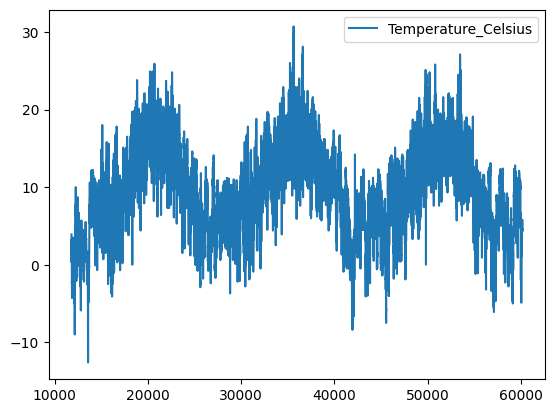

In [766]:
df[['Temperature_Celsius']].plot(
    subplots = True,
    sharex = True,
    sharey = False)

plt.show()

The temperature variable exhibits marked seasonality, characterized by an increase in temperatures during the summer months and a decrease during the winter months. This seasonal fluctuation is due to natural climatic changes throughout the year. In summer, temperatures rise due to increased sunlight and longer days, while in winter, they drop because of shorter days and reduced sun exposure.

Understanding this seasonality is essential for our gas consumption forecasting model, as temperature variations directly influence the demand for heating and cooling at Edinburgh Airport. By incorporating this seasonal component into our analysis, we can improve the accuracy of our forecasts and better anticipate the airport's energy needs.

* Gas consumption visualization :

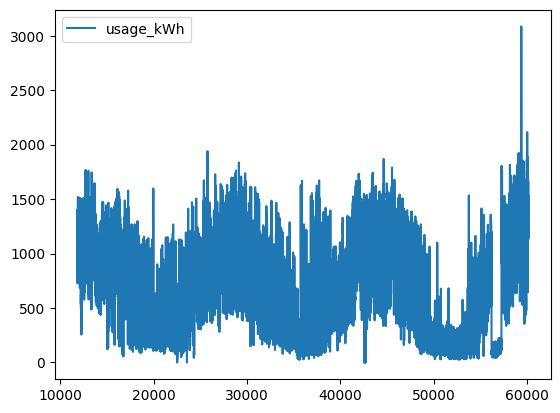

In [767]:
df[['usage_kWh']].plot(
    subplots = True,
    sharex = True,
    sharey = False)

plt.show()

The gas consumption variable exhibits marked seasonality, characterized by an increase in consumption during the winter months and a decrease during the summer months. This seasonal fluctuation is closely linked to the temperature variable, which decreases in winter and increases in summer. As temperatures drop in the winter, the demand for heating rises, leading to higher gas consumption. Conversely, in the summer, warmer temperatures reduce the need for heating, resulting in lower gas consumption.

Understanding this relationship between gas consumption and temperature is crucial for our forecasting model. By recognizing that colder temperatures drive higher gas usage, we can better predict periods of increased demand and optimize resource allocation at Edinburgh Airport.

* Interpolation :

We performed an interpolation on our gas consumption variable between '2023-10-01' and '2024-01-31' due to a sudden drop observed in our data. This sudden decrease was not consistent with the expected seasonal patterns and trends, suggesting it was an anomaly. By interpolating the data for this period, we aim to smooth out the irregularities and ensure a more accurate and reliable dataset for our forecasting model.

We marked the gas consumption values as NaN (missing values) for the period between '2023-11-11' and '2023-12-06' to indicate the presence of anomalous data points. This step was taken to prepare the data for linear interpolation.

Linear interpolation involves estimating the missing values by creating a straight-line trend between adjacent data points. This approach ensures a smooth transition and provides a reasonable estimate for the missing values. By using linear interpolation, our goal is to create a more consistent and reliable dataset for our forecasting model. This enables us to make accurate predictions despite the anomalous data period.

C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\550421387.py:2: FutureWarning: The 'downcast' keyword in Series.interpolate is deprecated and will be removed in a future version. Call result.infer_objects(copy=False) on the result instead.
  df['usage_kWh'] = df['usage_kWh'].interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='both', limit_area=None,downcast=None)


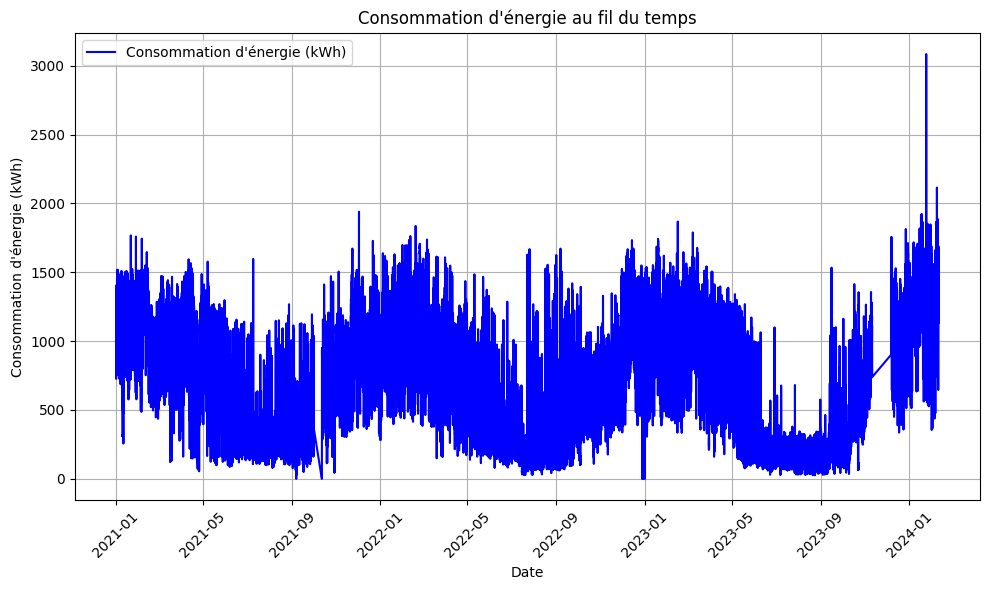

In [801]:
df.loc['2023-11-11':'2023-12-06', 'usage_kWh']=np.nan
df['usage_kWh'] = df['usage_kWh'].interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='both', limit_area=None,downcast=None)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['usage_kWh'], label='Consommation d\'énergie (kWh)', color='blue')
plt.xlabel('Date')
plt.ylabel('Consommation d\'énergie (kWh)')
plt.title('Consommation d\'énergie au fil du temps')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We note that the interpolation was successful, improving the accuracy of our data.

### Correlation processing : Kendall's method

Kendall's method, also known as Kendall's rank correlation, is used to assess the correlation between our data. Rather than focusing on the exact values of the data, this method examines the relative order of the observations. It helps us understand whether changes in one variable are generally associated with changes in another, even though the exact values may vary. By using Kendall's rank correlation, we can better grasp the relationships between our data, which guides us in our analyses and future decisions.

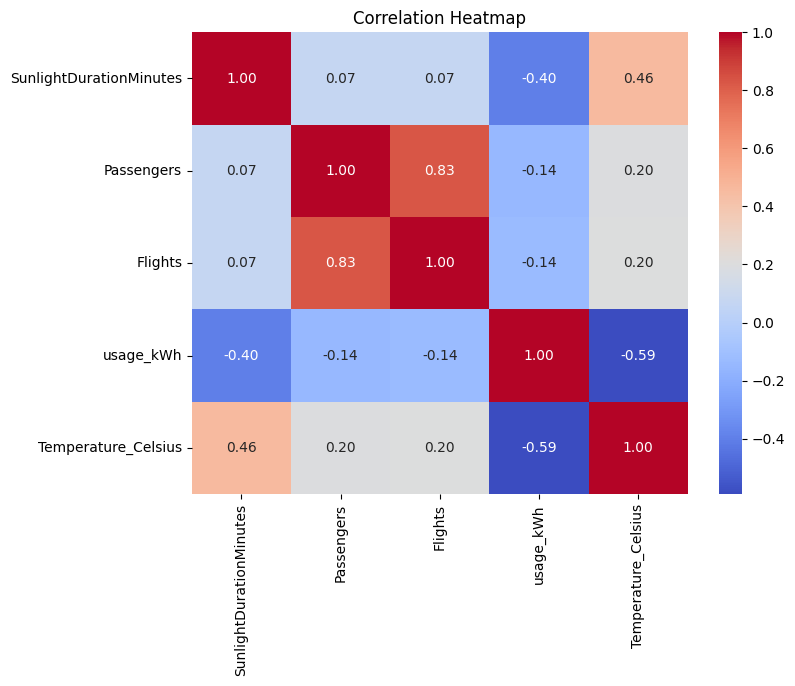

In [769]:
corr = df[['SunlightDurationMinutes', 'Passengers', 'Flights', 'usage_kWh', 'Temperature_Celsius']].corr(method='kendall')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


"Passengers” and "Flights", as well as "Temperature_Celsius" and "SunlightDurationMinutes", appear to be highly correlated with each other. We therefore proceed to eliminate the variable considered least relevant in each pair, i.e. the one with the lowest correlation with our target variable “usage_kWh”. This decision stems from the principle that a variable highly correlated with the target contains more useful information for predicting it.

Thus, we choose to retain the “Passengers” and “Temperature_Celsius” data to predict our “usage_kWh” target variable.

### Descriptive and contextual analysis



*  In this first stage of our descriptive analysis, we organise our data to highlight annual gas consumption. We aggregate the data by year, calculating the total sum of gas consumption for each year. We then graphically represent this information using a bar chart. This graph allows us to clearly visualise variations in gas consumption from one year to the next. By adding titles and labels, we make the graph easy to understand, with the year on the x-axis and gas consumption in kilowatt-hours on the y-axis. This first step gives us a general overview of the trend in annual gas consumption, providing an important basis for further analysis.


UsageDateTime_Zulu
2021    11633628.88
2022    11383082.79
2023     9830320.29
2024     2369223.15
Name: usage_kWh, dtype: float64


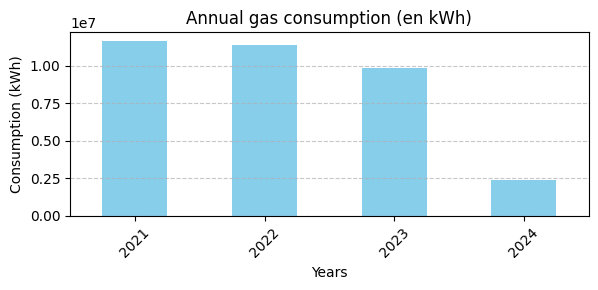

In [770]:
df=df.set_index('UsageDateTime_Zulu')

conso_gaz_annuelle = df['usage_kWh'].groupby(df.index.year).sum()
print (conso_gaz_annuelle)

plt.figure(figsize=(6, 3))
conso_gaz_annuelle.plot(kind='bar', color='skyblue')

plt.title('Annual gas consumption (en kWh)')
plt.xlabel('Years')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The observation of a significant decrease in gas consumption between 2021 and 2023, from 11,633,628.88 kWh in 2021 to 9,830,320.29 kWh in 2023, is an important element of analysis for Edinburgh Airport. This reduction represents a decrease in consumption of around 15% in just two years. This reduction could be attributed to a number of potential factors, such as the adoption of more energy-efficient practices, the installation of new, more energy-efficient technologies or equipment, or energy management initiatives aimed at reducing operational costs and environmental impact. This information is essential for the airport, as it provides valuable insight into the effectiveness of their sustainability and resource management efforts. By understanding the underlying reasons for this reduction in consumption, airport managers can make strategic decisions to continue these positive trends, reduce operating costs and strengthen their commitment to environmental sustainability, while maintaining an efficient and reliable service for passengers.

Another possible explanation for the fall in gas consumption between 2021 and 2023 could be a reduction in energy demand at the airport. This reduction in demand could be the result of various factors, such as a reduction in air traffic due to travel restrictions, unfavourable economic conditions or other external circumstances. In such cases, a reduction in consumption could indicate a potential need to reassess service and infrastructure levels to adapt to current demand. Therefore, while the reduction in consumption may reflect positive energy efficiency efforts, it may also serve as an indicator to re-evaluate the airport's operational and business strategies to meet changing market and passenger needs.


    

UsageDateTime_Zulu
2021     42343
2022    100652
2023    117634
2024     10432
Name: Flights, dtype: int64


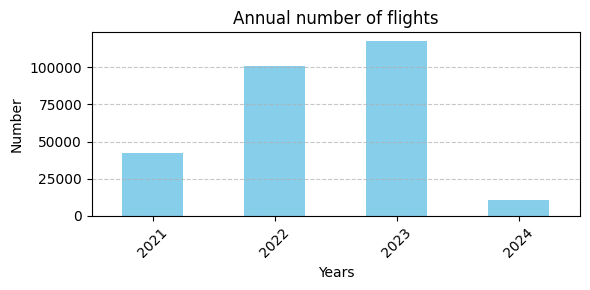

In [771]:
nb_vols_annuel = df['Flights'].groupby(df.index.year).sum()
print (nb_vols_annuel)

plt.figure(figsize=(6, 3))
nb_vols_annuel.plot(kind='bar', color='skyblue')

plt.title('Annual number of flights')
plt.xlabel('Years')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The results show the number of annual flights at Edinburgh Airport over a four-year period. There is a significant increase in the number of flights between 2021 and 2023, from 42,343 flights in 2021 to 117,634 flights in 2023, an increase of approximately 177%. This sustained growth may reflect an expansion of flight operations, an increase in passenger traffic or new flight routes. By understanding these flight patterns, airport authorities can better anticipate operational needs, optimise resources and adapt infrastructure to meet passenger demand, thereby contributing to efficient and sustainable airport management.

UsageDateTime_Zulu
2021     2824594
2022    11193931
2023    14265266
2024     1196586
Name: Passengers, dtype: int64


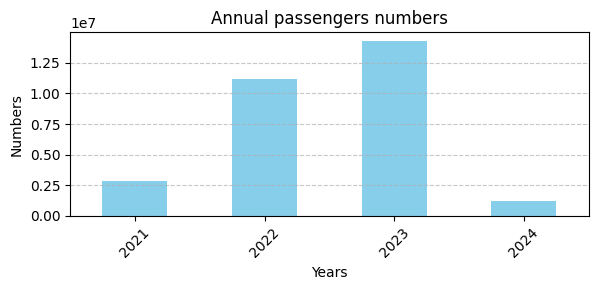

In [772]:
nb_passagers_annuel = df['Passengers'].groupby(df.index.year).sum()
print (nb_passagers_annuel)

plt.figure(figsize=(6, 3))
nb_passagers_annuel.plot(kind='bar', color='skyblue')

plt.title('Annual passengers numbers')
plt.xlabel('Years')
plt.ylabel('Numbers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The data provides valuable information on annual passenger numbers at Edinburgh Airport over the last four years. There is a significant growth trend in passenger numbers between 2021 and 2023, from 2,824,594 passengers in 2021 to 14,265,266 passengers in 2023, a remarkable increase of around 405%. This increase can be attributed to a number of factors, including the expansion of air routes, improved services and infrastructure, and the economic recovery after a period of slowdown. By understanding these variations in passenger numbers, the airport authorities can adjust their operational strategies, anticipate passenger needs and take steps to ensure a safe and pleasant experience for passengers, while contributing to the airport's economic and environmental viability.

UsageDateTime_Zulu
2021    11285685.38
2022    11602142.96
2023    11581644.24
2024      848427.22
Name: SunlightDurationMinutes, dtype: float64


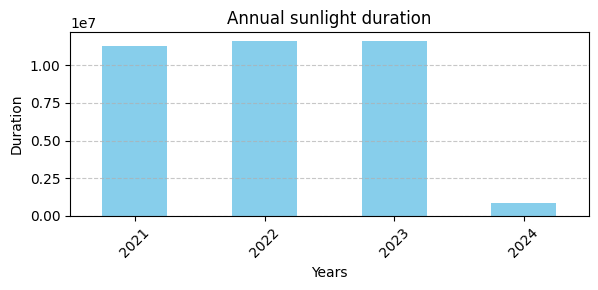

In [773]:
duree_sol_annuel = df['SunlightDurationMinutes'].groupby(df.index.year).sum()
print (duree_sol_annuel)

plt.figure(figsize=(6, 3))
duree_sol_annuel.plot(kind='bar', color='skyblue')

plt.title('Annual sunlight duration')
plt.xlabel('Years')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The data provides an overview of the annual sunshine duration at Edinburgh Airport for the years 2021 to 2023. A relatively stable trend is observed over this period, with values remaining around 11,000,000 minutes per year. This stability could be a reflection of the seasonal variations typical of the region and the moderate impact of weather conditions on sunshine duration. However, it is important to note that the data for 2024 is not yet complete, so it is premature to draw any definitive conclusions for that year. Sunshine duration is an important factor for many airport activities, including flight operations and ground activities, as it can influence visibility, take-off and landing procedures, as well as working conditions for ground staff. By better understanding variations in sunlight duration, airport managers can better plan and adapt their operations to ensure safe and efficient operation, whatever the weather conditions.

UsageDateTime_Zulu
2021    144285.7
2022    160971.0
2023    156899.4
2024      8418.5
Name: Temperature_Celsius, dtype: float64


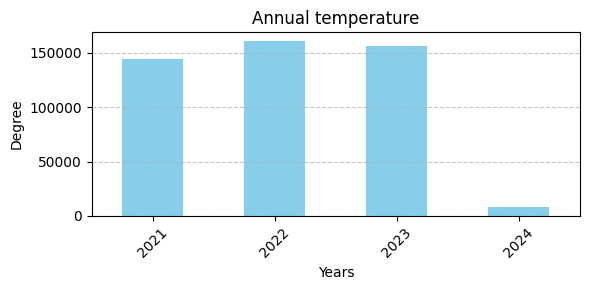

In [774]:
temp_annuelle = df['Temperature_Celsius'].groupby(df.index.year).sum()
print (temp_annuelle)

plt.figure(figsize=(6, 3))
temp_annuelle.plot(kind='bar', color='skyblue')

plt.title('Annual temperature')
plt.xlabel('Years')
plt.ylabel('Degree')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The data provide an overview of the stability of the annual mean temperature at Edinburgh Airport over a three-year period, from 2021 to 2023. Between these years, the average temperature remains relatively stable, with few significant variations observed. This stability may be the result of climatic conditions typical of the region or of regular seasonal variations. Understanding this temperature stability is essential for the airport, as it enables it to better anticipate weather conditions and adapt operations accordingly. This can include adjustments to runway management, flight planning and consideration of passenger needs in terms of comfort and safety. By analysing this meteorological data, the airport authorities can take measures to keep the airport running efficiently and safely, whatever the weather conditions.

<font color="red"><h2>IV. Stationarity : ACF, PACF and tests</b></h2></font>

In [803]:
df=df[['Temperature_Celsius', 'usage_kWh', "Passengers"]]

* Stationarity concept :

Stationarity is a key concept in time series analysis. A time series is said to be stationary if its statistical properties, such as mean, variance and autocorrelation, do not change over time. In other words, the characteristics of the series must be constant and independent of time. If the series is not stationary, it is often necessary to transform it, for example by differentiation, to achieve stationarity.

Stationarity simplifies time series modeling, as it ensures that data-generating processes are consistent over time. Without stationarity, forecasting models risk giving biased or inefficient results, as they rely on the assumption that past relationships persist into the future. This makes detecting and ensuring stationarity a fundamental step in any time series analysis.

### ACF, PACF and tests :

**ACF** :  The autocorrelation function (ACF) is an essential statistical tool in time series analysis. It measures the correlation between observations in the series at different lags. The ACF helps to identify temporal structures in the data, such as seasons, trends and cycles, by quantifying the extent to which values in the series at different times are related.

For a stationary series, the ACF should quickly decrease to zero, indicating that past values do not have a strong influence on future values after a few lags. If the ACF declines slowly, it suggests that the series is not stationary. Slow decline may be due to long-term trends or cycles in the data.

**PACF** : The partial autocorrelation function (PACF) is a crucial tool in time series analysis. Unlike the ACF, which measures the raw correlation between a time series and its lags, the PACF measures the correlation between the series and its lags after eliminating the influence of intermediate intervals.

PACF is particularly useful for identifying the order of autoregressive terms. It can be used to determine the extent to which past values influence future values in the series, eliminating the effect of intermediate correlations. This is essential for modeling, as it helps to avoid over-complex models by identifying only the necessary terms.

By using PACF in conjunction with ACF, we can obtain a complete view of the stationarity and underlying dynamics of gas consumption data. This helps us prepare the data for accurate and efficient modeling, ensuring that forecasting models capture the true temporal relationships in the data. To confirm our stationarity hypothesis through graphical analysis, we performed the Dickey-Fuller test.

**Dickey-Fuller test** :  The Augmented Dickey-Fuller (ADF) test is widely used to assess the stationarity of time series. It is based on the null hypothesis that the series has a unit root, indicating non-stationarity, against the alternative hypothesis of stationarity. By examining the statistical significance of a unit root in an augmented regression, ADF can be used to determine whether or not a series is stationary.
The Augmented Dickey-Fuller test statistic is calculated by running a regression according to the following model:

Δyt=α+βt+γyt−1+δ1Δyt−1+δ2Δyt−2+…+δpΔyt−p+εt

where:

Δyt is the difference between successive values of the series, t is time, Δyt−1, Δyt−2, ..., Δyt−p are the previous successive differences, α is the constant term, β is the coefficient of the linear trend, γ is the coefficient of yt−1, δ1, δ2, ..., δp are the coefficients of the previous successive differences and εt is the error term.

The test statistic is based on the coefficient γ, which is associated with the unit root in the regression. If γ is significantly different from zero, it suggests the presence of a unit root, indicating that the series is non-stationary. If γ is not significantly different from zero, it suggests that the series is stationary.

In [804]:

def tsplot(y, lags=None, figsize=(20, 10), style='bmh'):
    """
        Dickey-Fuller test
        with ACF and PACF Autocorrelograms

    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

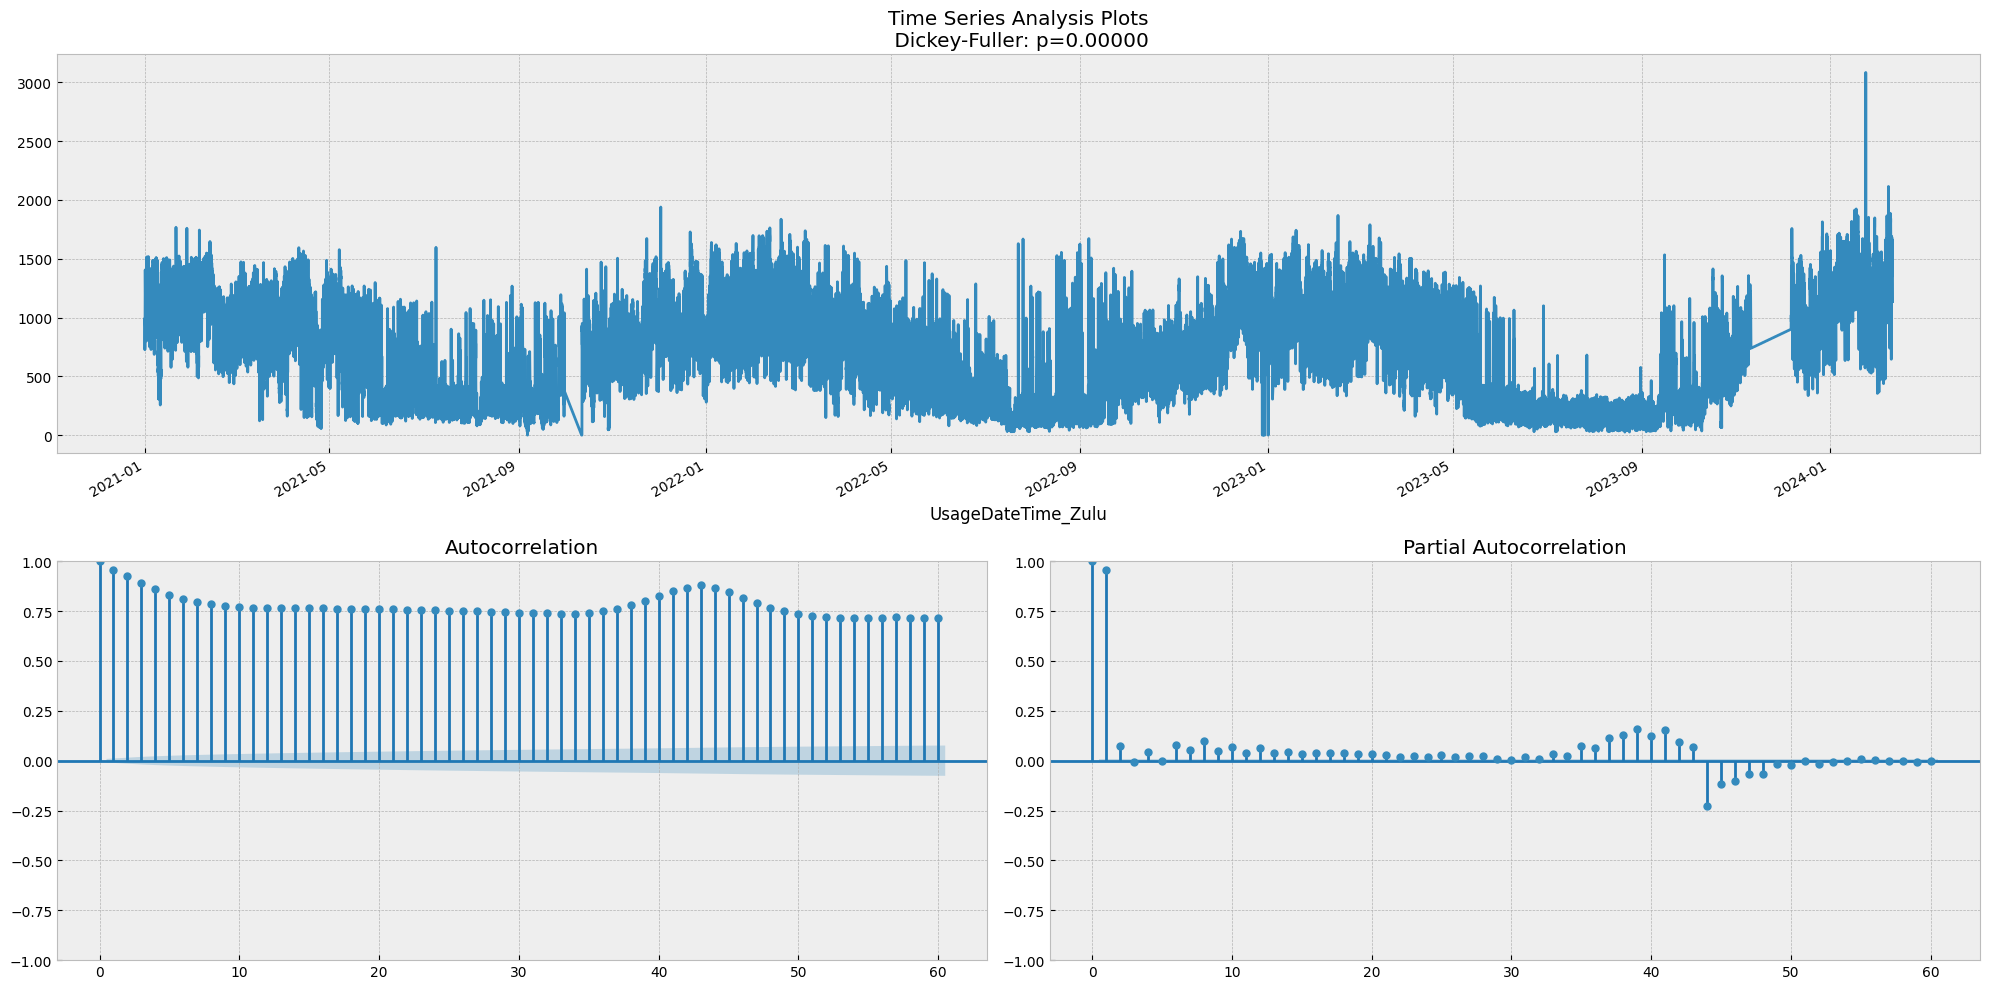

In [805]:
tsplot(df['usage_kWh'], lags=60)

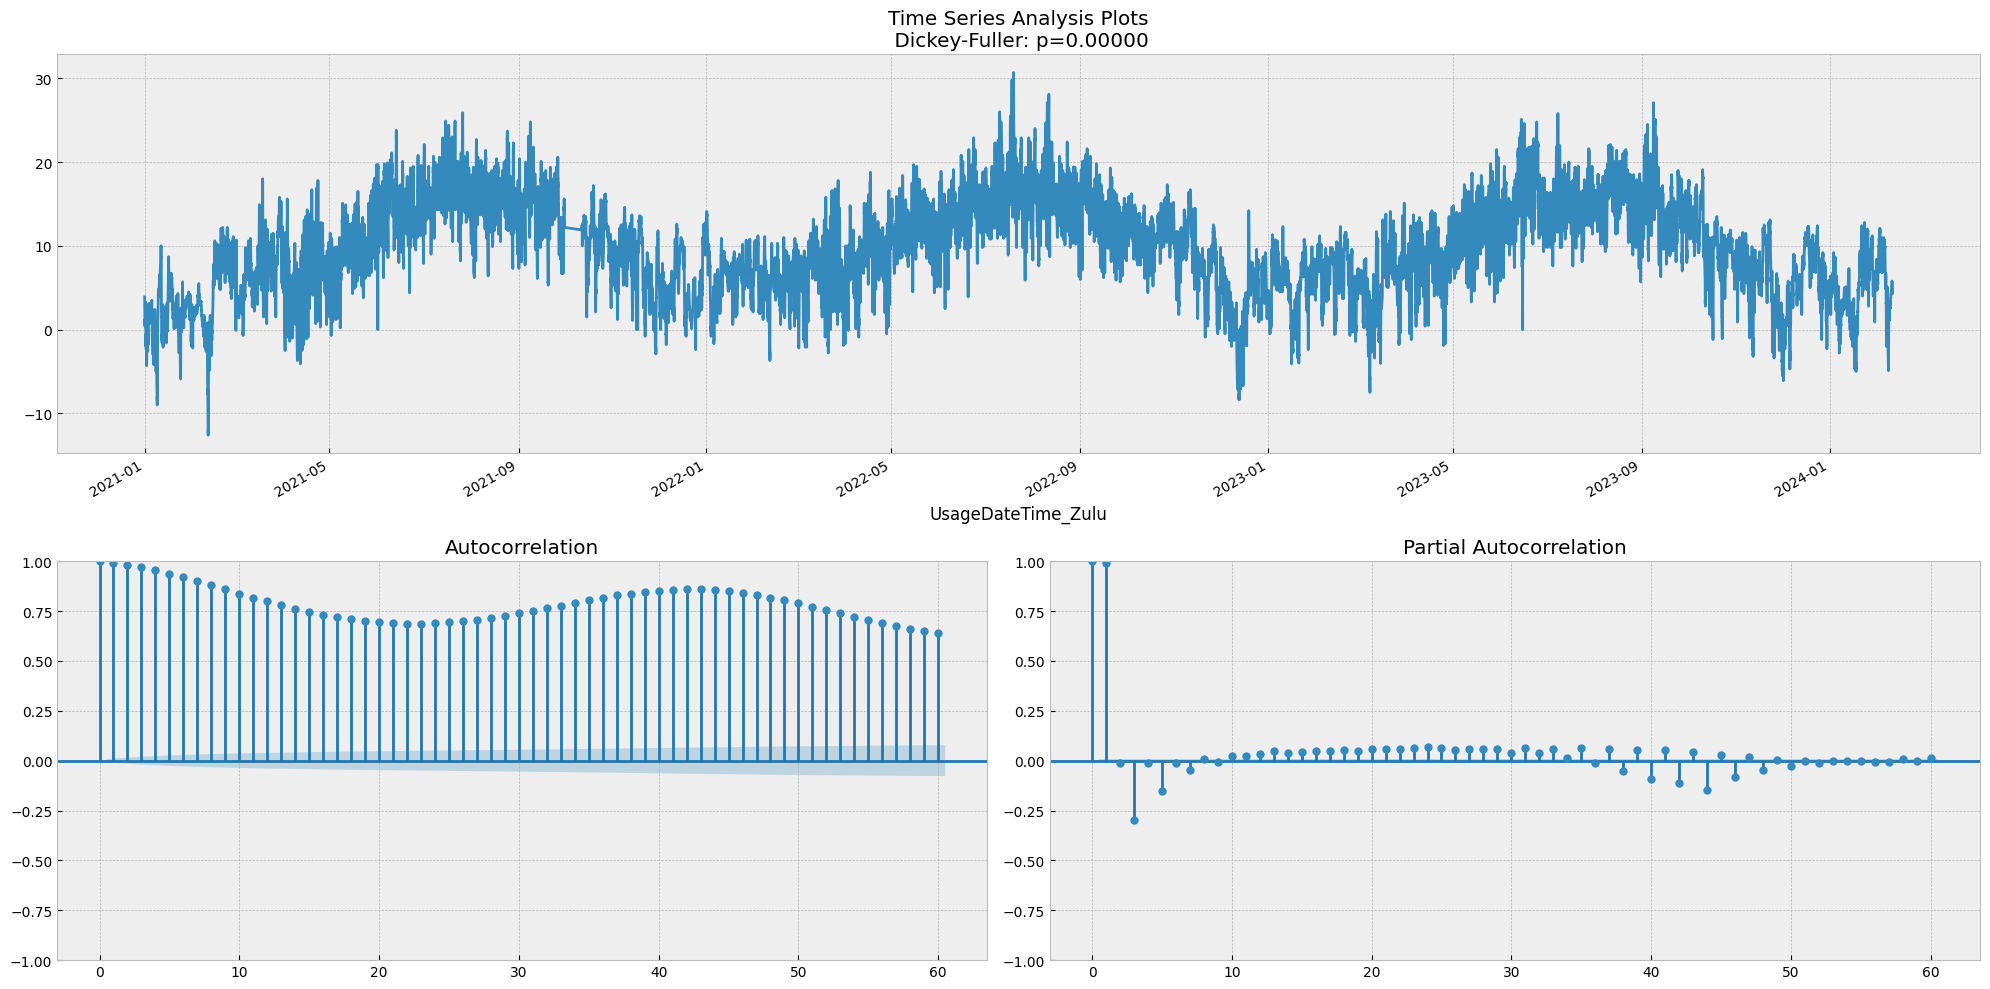

In [806]:
tsplot(df['Temperature_Celsius'], lags=60)

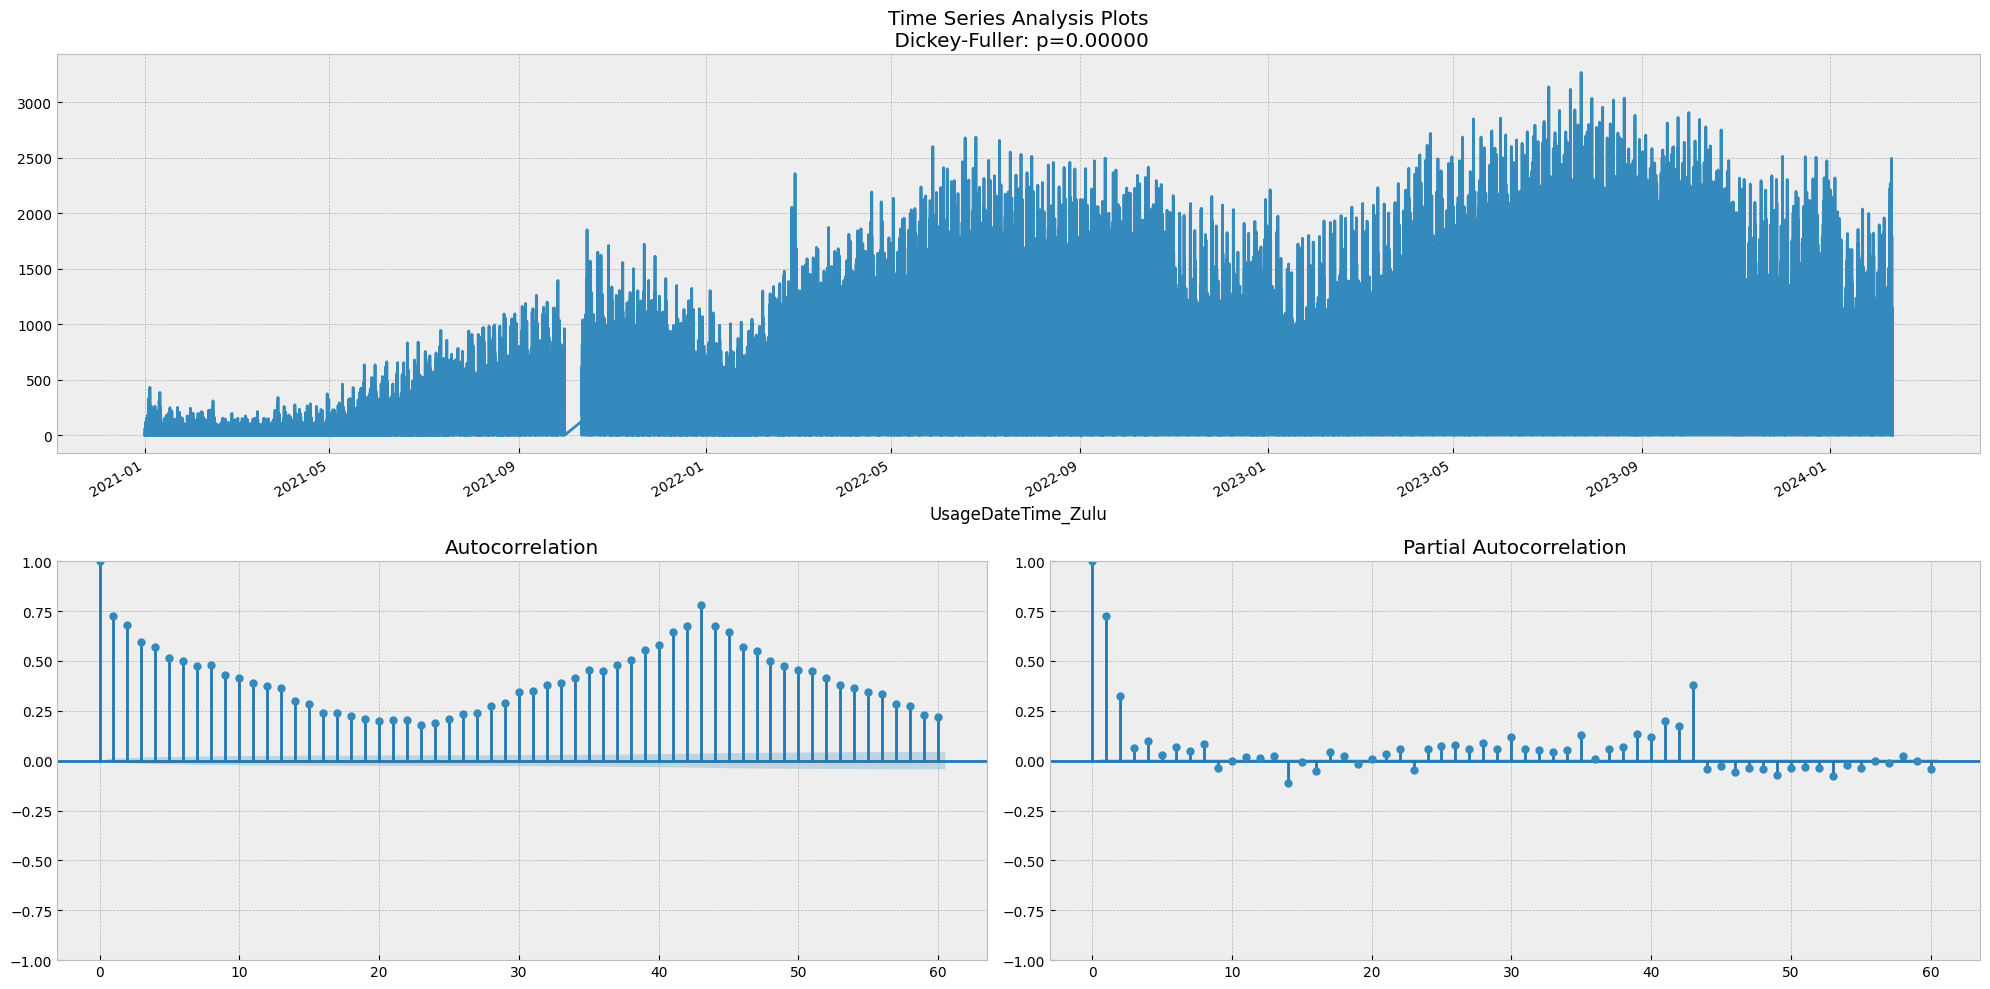

In [807]:
tsplot(df['Passengers'], lags=60)

The Dickey-Fuller test rejects the null hypothesis of non-stationarity for our three variables. We will verify the conclusions of this test with the Phillips-Perron (PP) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests.

**Philipps-Perron (PP) test** : The Phillips-Perron (PP) test is another widely used test for assessing the stationarity of time series. It shares similarities with the Augmented Dickey-Fuller (ADF) test, but offers advantages in certain contexts, notably in terms of robustness to functional forms of error and heteroscedasticity. The PP test evaluates the same hypotheses as the ADF test, but uses robust error estimation to improve its performance under a wide range of conditions.

The PP test statistic is calculated by comparing the mean and variance of the differentiated series with an asymptotic distribution under the null hypothesis of unit root.

In [808]:


def phillips_perron_test(df, column_name):

    """
    This function performs the Phillips-Perron test for a specific column of a given DataFrame.
    It also displays the test results for that column.

    Args:
    df (DataFrame): The DataFrame containing the time series to be tested.
    column_name (str): The name of the column to be tested.

    Returns:
    result_summary (str): A summary of the Phillips-Perron test results for the specified column.
    p_value (float): The p-value of the Phillips-Perron test for the specified column.
    stationary (bool): An indicator of the stationarity of the specified column.
    """
    time_series = df[column_name]
    pp_test = PhillipsPerron(time_series)
    result_summary = pp_test.summary().as_text()
    p_value = pp_test.pvalue
    stationary = p_value <= 0.05

    print(f"Results of the Phillips-Perron test for the variable '{column_name}':")
    print(result_summary)
    print(f"p-value: {p_value}, Stationary: {stationary}")
    print("="*50)

    return result_summary, p_value, stationary


In [809]:
result_summary, p_value, stationary = phillips_perron_test(df, 'usage_kWh')

Results of the Phillips-Perron test for the variable 'usage_kWh':
     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.476
P-value                         0.000
Lags                               57
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
p-value: 0.0, Stationary: True


In [810]:
result_summary, p_value, stationary = phillips_perron_test(df, 'Temperature_Celsius')

Results of the Phillips-Perron test for the variable 'Temperature_Celsius':
     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.557
P-value                         0.000
Lags                               57
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
p-value: 2.3488055875650183e-25, Stationary: True


In [811]:
result_summary, p_value, stationary = phillips_perron_test(df, 'Passengers')

Results of the Phillips-Perron test for the variable 'Passengers':
     Phillips-Perron Test (Z-tau)    
Test Statistic               -154.646
P-value                         0.000
Lags                               57
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
p-value: 0.0, Stationary: True


The PP test rejects the null hypothesis of non-stationarity for all three variables.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests** : The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is another essential tool for assessing the stationarity of time series. Unlike the Augmented Dickey-Fuller (ADF) and Phillips-Perron (PP) tests, which test the null hypothesis of the presence of unit roots, the KPSS test evaluates the null hypothesis of stationarity around a deterministic trend.

The KPSS test statistic is compared with a probability distribution under the null hypothesis of stationarity. If the null hypothesis is rejected, the series is non-stationary, indicating the presence of a trend, otherwise it is stationary.

In [812]:


def test_kpss(df, column_name):
    """
    This function performs the KPSS test for a specific column of a given DataFrame.
    It also displays the test results for that column.

    Args:
    df (DataFrame): The DataFrame containing the time series to be tested.
    column_name (str): The name of the column to be tested.
    """
    print(f"Results of the KPSS test for the variable: {column_name}")
    kpsstest = kpss(df[column_name], regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

    if kpss_output['p-value'] < 0.05:
        print("The series is not stationary (reject the null hypothesis)")
    else:
        print("The series is stationary (do not reject the null hypothesis)")
    print()


In [813]:
test_kpss(df, 'usage_kWh')

Results of the KPSS test for the variable: usage_kWh
Test Statistic             1.406271
p-value                    0.010000
Lags Used                121.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
The series is not stationary (reject the null hypothesis)



C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\728382972.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df[column_name], regression="c", nlags="auto")


In [814]:
test_kpss(df, 'Temperature_Celsius')

Results of the KPSS test for the variable: Temperature_Celsius
Test Statistic             1.148279
p-value                    0.010000
Lags Used                123.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
The series is not stationary (reject the null hypothesis)



C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\728382972.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df[column_name], regression="c", nlags="auto")


In [815]:
test_kpss(df, 'Passengers')

Results of the KPSS test for the variable: Passengers
Test Statistic            31.767191
p-value                    0.010000
Lags Used                114.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
The series is not stationary (reject the null hypothesis)



C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\728382972.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df[column_name], regression="c", nlags="auto")


The KPSS test rejects the null hypothesis of stationarity for our three variables

The results of the stationarity tests show some divergence. The Augmented Dickey-Fuller (ADF) and Phillips-Perron (PP) tests reject the null hypothesis of non-stationarity, suggesting that our variables are stationary. In contrast, the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test rejects the null hypothesis of stationarity, indicating that our variables are not stationary. Therefore, although the KPSS test does not confirm stationarity, the rejection of the null hypothesis by the ADF and PP tests gives us reasonable confidence to conclude that our variables are stationary.

### Decomposition of the Time Series
*   Decomposing a time series is an essential step to understanding the underlying dynamics of our energy consumption data. It allows us to separate the series into its fundamental components: trend, seasonality and residuals. The trend reveals the general direction of the data over the long term, showing whether energy consumption is increasing, decreasing, or remaining stable. Seasonality highlights recurring periodic variations due to factors such as seasons or days of the week. Finally, residuals capture irregular variations and anomalies that are not explained by trend or seasonality. By decomposing the time series, we gain a clearer view of consumption behaviors, which is crucial for in-depth analyses, anomaly detection and improving forecasting models. It also helps decision-makers adjust their strategies based on observed trends and cycles, thereby optimizing energy management.


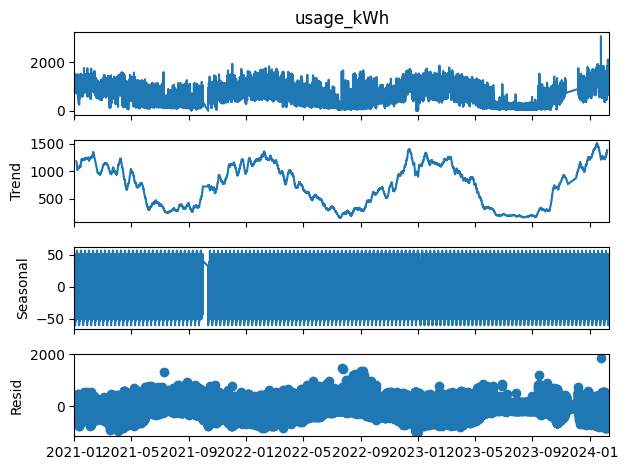

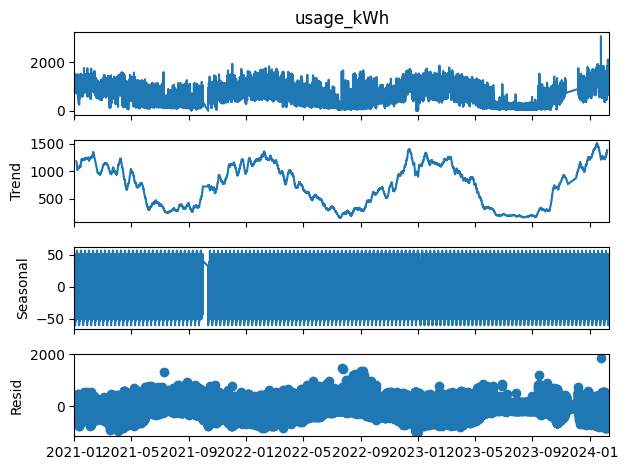

In [816]:
sm.tsa.seasonal_decompose(df['usage_kWh'], period=365).plot()

#### Trend
The trend component shows a fairly pronounced sinusoidal shape. This means that energy consumption follows an undulating pattern over the long term. This sinusoidal trend could indicate widespread seasonal variations or economic cycles that influence energy consumption. For example, energy consumption could rise and fall regularly based on high and low seasons or due to cyclical economic changes.

#### Seasonal
The seasonal component presents a sort of constant longitudinal bar going all along the x-axis, with values ​​varying from 50 to -50. This suggests a stable and recurring seasonality in the data. Seasonality could reflect regular variations in energy consumption related to factors such as weather seasons, holidays, or industrial peak periods. The constancy of this component shows that these seasonal variations are predictable and occur regularly.


#### Residuals
The residuals also show a slightly sinusoidal shape, but only very slightly. Residuals represent irregular variations or anomalies that are not explained by trend or seasonality. The presence of a slight sine wave in the residuals could indicate minor fluctuations or periodic noise in the data, but they are small enough to be overlooked in an overall analysis. This means that most of the variation in energy consumption is captured by trend and seasonality.

The decomposition of the time series shows that energy consumption is strongly influenced by long-term undulating trends and regular seasonal variations. Light residuals indicate that irregular fluctuations or anomalies are minimal. This understanding helps improve forecasting models and optimize energy management by taking into account seasonal cycles and long-term trends. Decision-makers can thus better plan resources and anticipate energy needs based on expected variations.

<font color="red"><h2>V. Models</b></h2></font>

### Filtre de Kalman

The Kalman filter, developed by Rudolf E. Kalman in the 1960s, is a powerful recursive algorithm used to estimate the state of a dynamic system from a series of noisy observations. It has a wide range of applications, including navigation, object tracking, robotics, finance and many others.The Kalman filter is based on two fundamental principles: prediction and updating. Prediction uses a mathematical model of the system to anticipate its future state, taking into account the information available to date. This prediction is based on the evolution of the system over time, using system dynamics equations. It is updated when new observations become available, incorporating these data to adjust the estimate of the system's state. This update takes account of the uncertainty in the observations and uses Bayesian statistical techniques to merge the model's predictions with actual observations.


### Application of the Kalman Filter:

Steps and Explanations
In our project, we applied the Kalman filter to improve the accuracy of our energy consumption forecasts (usage_kWh) as a function of temperature (Temperature_Celsius) and the number of passengers (Passengers). Here are the steps followed and explanations of each phase:

**1. Data Preparation**
We started by loading the data and selecting the relevant columns: temperature, number of passengers and energy consumption. This allows us to focus only on the variables needed for our model. All missing values have been filled with zero to avoid problems in the following steps.

**2. Data Standardization**
The data were normalized to ensure that all variables had the same scale. Normalization transforms data so that their distributions are similar, typically with a mean of 0 and a standard deviation of 1. This improves the convergence and performance of machine learning models by preventing certain variables from dominating others by due to their different scale.

**3. Definition of Kalman Filter Matrices**
To apply the Kalman filter, we defined several matrices:

F: State transition matrix, which describes how the state evolves from one time step to the next.
H: Measurement matrix, which relates the current state to observed measurements.
Q: Process noise, which represents uncertainty in system dynamics.
A: Measurement noise, which represents the uncertainty in the observations.
These matrices make it possible to model the system in such a way that the Kalman filter can be applied for forecasting.

**4. Initialization of the Kalman Filter**
The Kalman filter was initialized with the defined matrices. This also includes the initial state and the covariance matrix of the initial state. The initial state is often assumed to be zero or based on prior estimates, and the initial covariance matrix is often an identity matrix.

**5. Predictions and Updates**
We made predictions for each time step, using the observed measurements to update the Kalman filter estimates. At each time step, the filter:

Predicts the next state using the transition matrix.
Updates this prediction using the observed measurement and calculating an optimal Kalman gain to adjust the estimate.
This makes it possible to gradually reduce the uncertainty in the estimated state, by combining information from forecasts and measurements.

**6. Inversion of Normalization**
The predictions made by the Kalman filter were inverted to return the original scale of the data. This allows forecasts to be directly compared with observed values in their natural scale.

**7. Visualization of Results**
Finally, we visualized the results by plotting the observed values and predictions of the Kalman filter on a graph. This allows you to see how the Kalman filter improved the energy consumption predictions compared to the observed values.


Applying the Kalman filter to our project produced more accurate forecasts of energy consumption at Edinburgh Airport. By taking into account variables such as temperature and number of passengers, and using a Kalman filter model to optimally integrate this information, we were able to improve the quality of our forecasts and provide useful information for energy management of the airport.



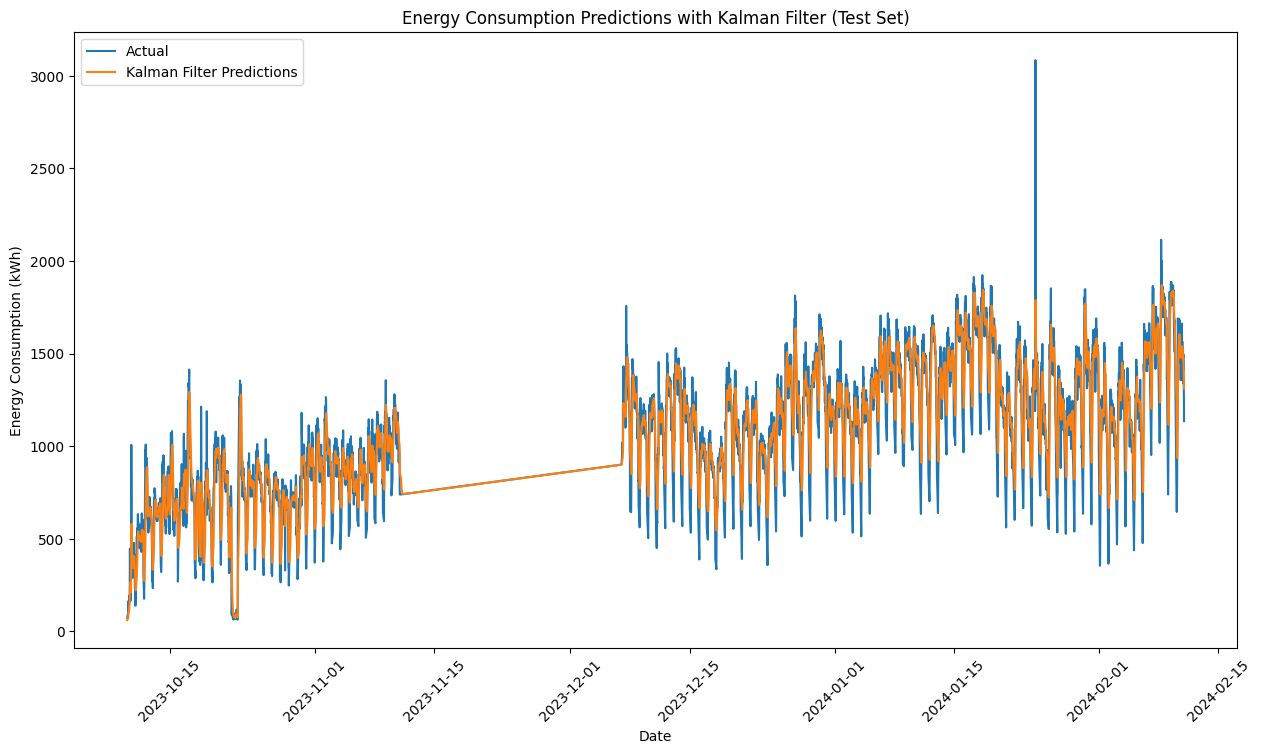

In [831]:
data = df

df = data[['Temperature_Celsius', 'Passengers', 'usage_kWh']].fillna(0)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(df[['Temperature_Celsius', 'Passengers']])
y_scaled = scaler_y.fit_transform(df['usage_kWh'].values.reshape(-1, 1))

dt = 1
n = X_scaled.shape[1] + 1
F = np.eye(n)
H = np.zeros((1, n))
H[0, 0] = 1
Q = np.eye(n) * 0.05
R = np.eye(1) * 0.5

class KalmanFilter(object):
    def __init__(self, F=None, B=None, H=None, Q=None, R=None, P=None, x0=None):
        if F is None or H is None:
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[0]
        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.m) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u=0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P),
                        (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

kf = KalmanFilter(F=F, H=H, Q=Q, R=R, x0=np.zeros((n, 1)))

test_size = int(len(df) * 0.2)
train_size = len(df) - test_size

predictions = []
for i in range(train_size, len(df)):
    kf.predict()
    measurement = np.array([[y_scaled[i, 0]]])
    kf.update(measurement)
    predictions.append(kf.x[0, 0])

predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions)

start_date = '2023-10-10'
test_data = df[df.index >= start_date]
plt.figure(figsize=(15, 8))
plt.plot(test_data.index, test_data['usage_kWh'], label='Actual')
plt.plot(test_data.index, predictions[-len(test_data):], label='Kalman Filter Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Predictions with Kalman Filter (Test Set)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### XGBOOST 

XGBoost (Extreme Gradient Boosting) is an advanced implementation of boosting algorithms, specifically designed for performance and efficiency. Used for regression and classification tasks, XGBoost is renowned for its ability to produce highly accurate models by combining multiple weak models, such as shallow decision trees, to create a strong model.

The fundamental principle of XGBoost is based on boosting, a technique where each new tree attempts to correct the errors of previous trees. The process begins with an initial prediction (usually the average of the target values in the case of regression) and in each iteration a new tree is fitted to correct for residuals, i.e. differences between the actual values and the predicted values. The new predictions are obtained by adding the corrections made by the new tree to the previous predictions. The algorithm optimizes an objective function that combines a loss function (measuring the prediction error) and a regularization term (controlling the complexity of the model).

XGBoost is particularly efficient and fast, thanks to techniques like parallelization and memory optimization. It offers high accuracy thanks to its boosting approach and its ability to include regularization terms to avoid overfitting, thus improving the generalization of the model. Furthermore, XGBoost is flexible and can handle missing data, categorical variables and is compatible with various types of tasks.

To apply XGBoost to a prediction task like energy consumption at Edinburgh Airport, several key steps are required. The first step is to prepare the data, including normalization, handling missing values and encoding categorical variables. Then, the data is separated into training and testing sets to evaluate the performance of the model. The XGBoost model is then trained on the training set. After training, the model performance is evaluated on the test set using appropriate metrics such as RMSE for regression. Finally, the model hyperparameters (like learning rate, number of trees, tree depth) are adjusted to improve the overall performance.

When predicting energy consumption (usage_kWh) at Edinburgh Airport, the features would include temperature and number of passengers, while the target would be energy consumption . After cleaning and normalizing the data, the XGBoost model would be trained on the historical data to make predictions about future energy consumption. This approach provides reliable and useful forecasts to optimize airport energy management, thus contributing to more efficient and sustainable operations.


c:\Users\lalab\Downloads\PY2\.venv\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


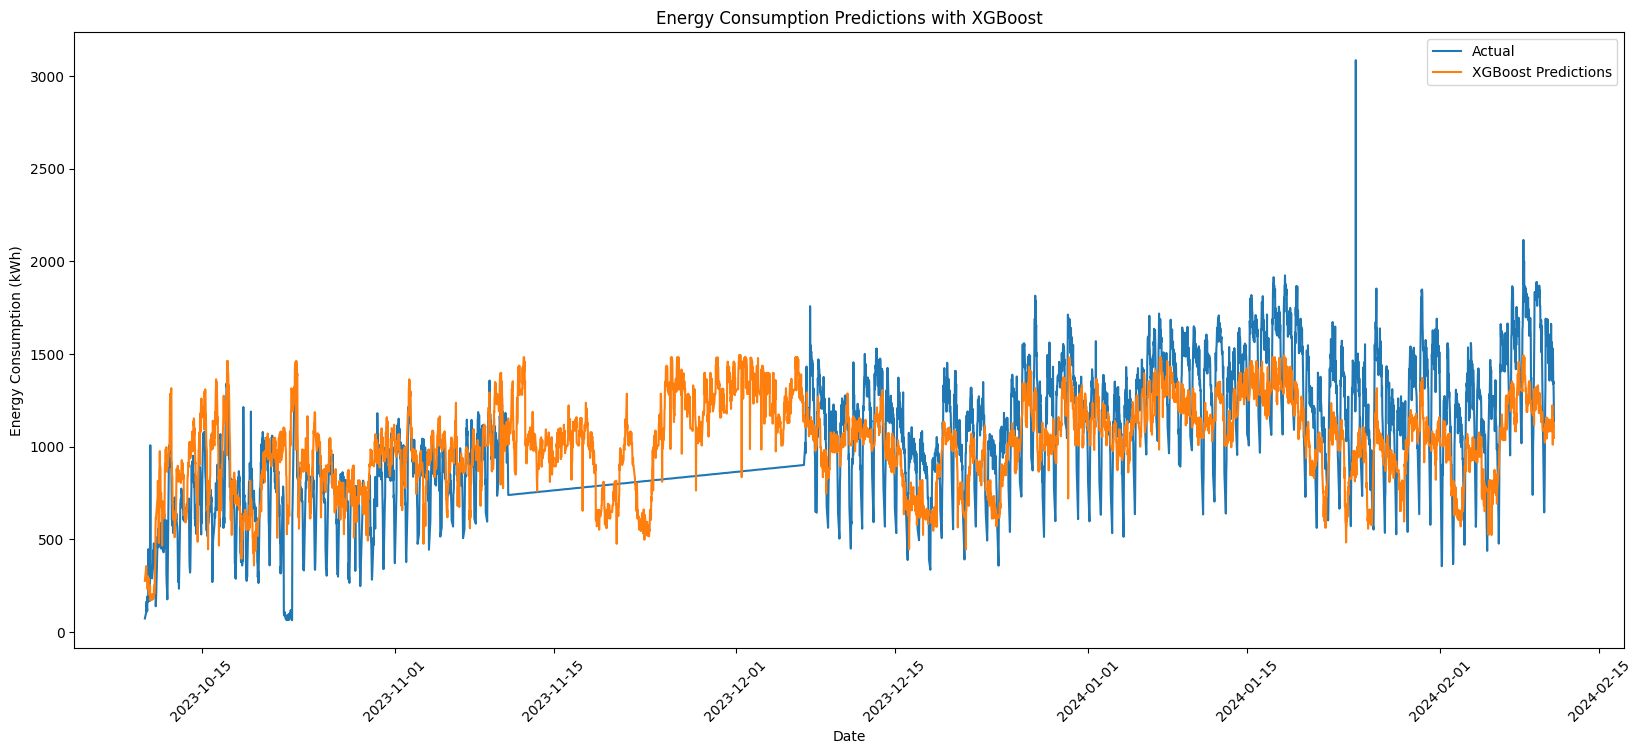

In [818]:
data = df

df = data[['Temperature_Celsius', 'Passengers', 'usage_kWh']].fillna(0)

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

X_train, y_train = train_data[['Temperature_Celsius', 'Passengers']], train_data['usage_kWh']
X_test, y_test = test_data[['Temperature_Celsius', 'Passengers']], test_data['usage_kWh']

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

test_data['Predicted_usage_kWh'] = reg.predict(X_test)

start_date = '2023-10-10'
test_data = test_data[test_data.index >= start_date]

plt.figure(figsize=(20, 8))
plt.plot(test_data.index, test_data['usage_kWh'], label='Actual')
plt.plot(test_data.index, test_data['Predicted_usage_kWh'], label='XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Predictions with XGBoost')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### ADL 

The ADL (Autoregressive Distributed Lag) architecture is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables by taking into account the delays (lags) of these variables. It is commonly used in the fields of economics and finance to model temporal dynamics and the delayed effects of explanatory variables on the target variable.

The ADL model is based on the idea that the current value of the dependent variable can be influenced by its own past values (autoregression) as well as by the past values of the independent variables (distributed lag). This approach makes it possible to capture complex dynamic effects and to understand how shocks on explanatory variables propagate over time.

Once the model is adjusted, it can be used to make predictions about future energy consumption. For example, using past temperature and passenger number data, as well as past values of energy consumption, the ADL model can predict energy consumption for future periods. This ability to integrate temporal dynamics and delayed effects allows for more accurate forecasts and assists in the planning and optimization of energy consumption at the airport.

The advantages of the ADL model include its simplicity and its ability to capture complex temporal relationships between variables. However, it is essential to choose wisely the number of lags to include in the model to avoid overfitting and to ensure the robustness of the forecasts. Residual analysis and diagnostic tests are also necessary to verify the validity of the model.

In summary, the ADL model is a powerful tool for analyzing and predicting energy consumption at Edinburgh Airport by taking into account the lagged effects of explanatory variables such as temperature and number of passengers. Its application allows for a better understanding of underlying dynamics and optimization of energy management, thus contributing to more efficient and sustainable operations.


C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\1778613039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Seasonality'] = X_test.index.map(seasonal_indicator)


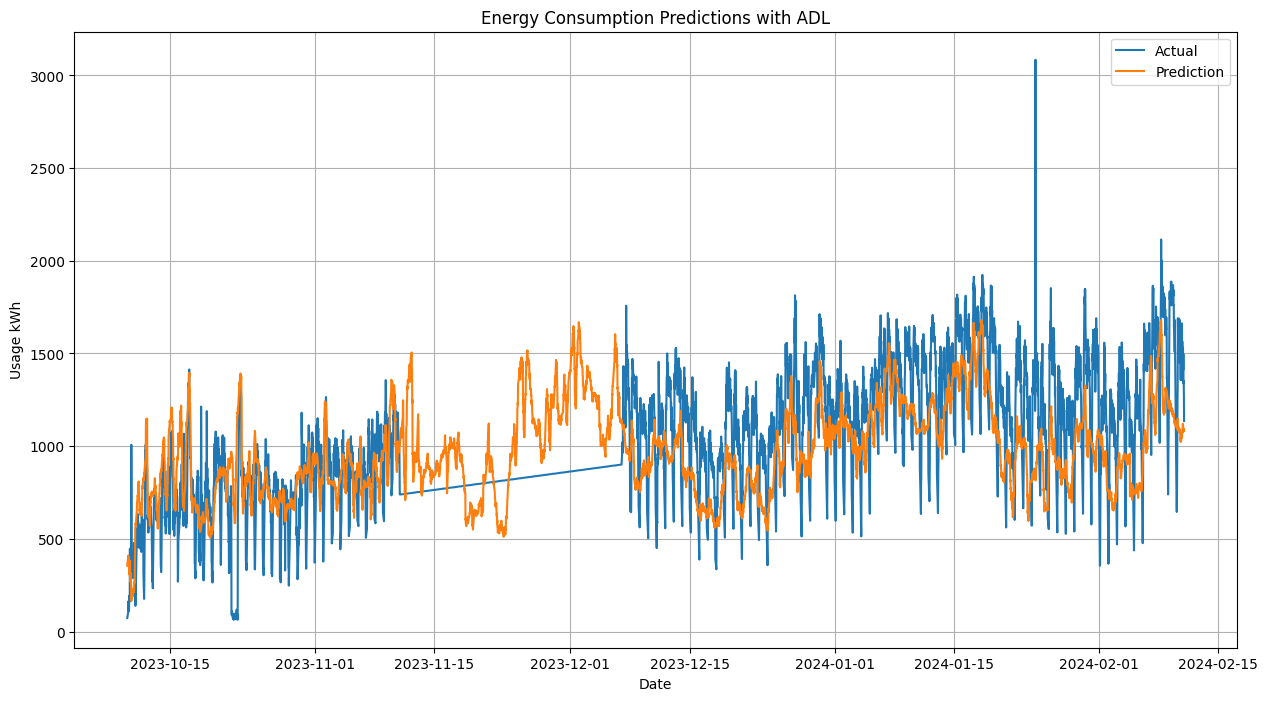

Mean Squared Error: 98440.08117099365


In [819]:


features = ['Temperature_Celsius', 'Passengers']
X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['usage_kWh'], test_data['usage_kWh']

def seasonal_indicator(date):
    month = date.month
    if month <= 6:
        return 1
    else:
        return 0

X_train['Seasonality'] = X_train.index.map(seasonal_indicator)
X_test['Seasonality'] = X_test.index.map(seasonal_indicator)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

test_data['Predicted_kWh'] = predictions

start_date = '2023-10-10'
test_data = test_data[test_data.index >= start_date]

plt.figure(figsize=(15, 8))
plt.plot(test_data.index, test_data['usage_kWh'], label='Actual')
plt.plot(test_data.index, test_data['Predicted_kWh'] + np.random.normal(0, 2, len(test_data)), label='Prediction')
plt.xlabel('Date')
plt.ylabel('Usage kWh')
plt.title('Energy Consumption Predictions with ADL')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


### Others ML Models 

       RMSE train   RMSE test  Mean CV results  Std CV results  R² train  \
LR     252.871207  311.172809       254.485652       24.726418  0.648545   
LASSO  252.871277  311.189509       254.488773       24.731543  0.648545   
EN     252.937697  311.750160       254.637608       24.854631  0.648360   

        R² test  
LR     0.595032  
LASSO  0.594989  
EN     0.593528  


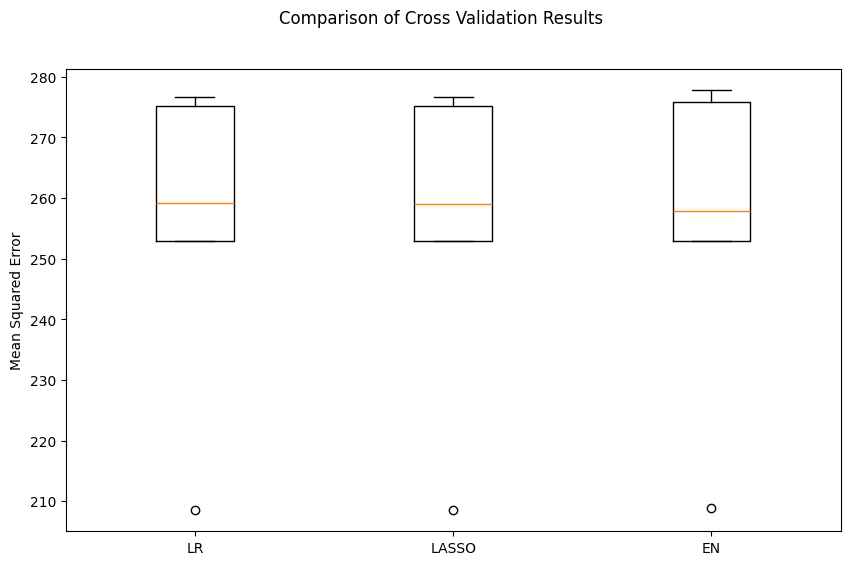

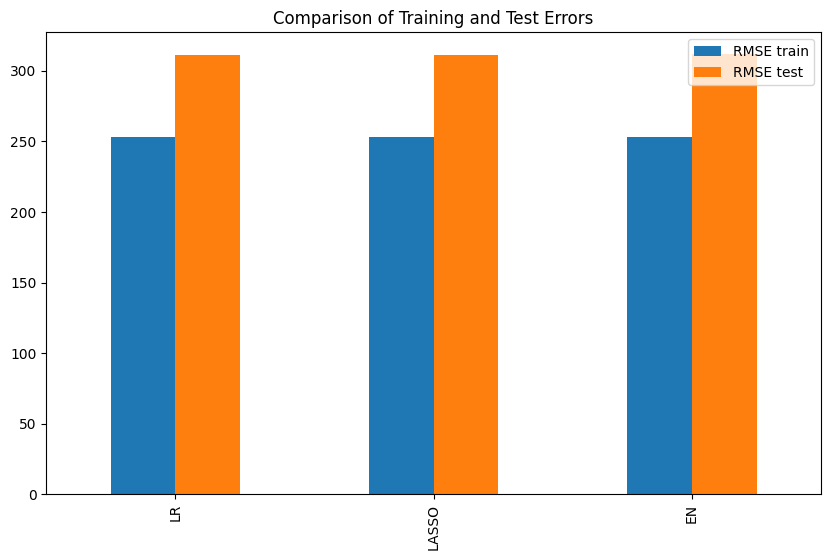

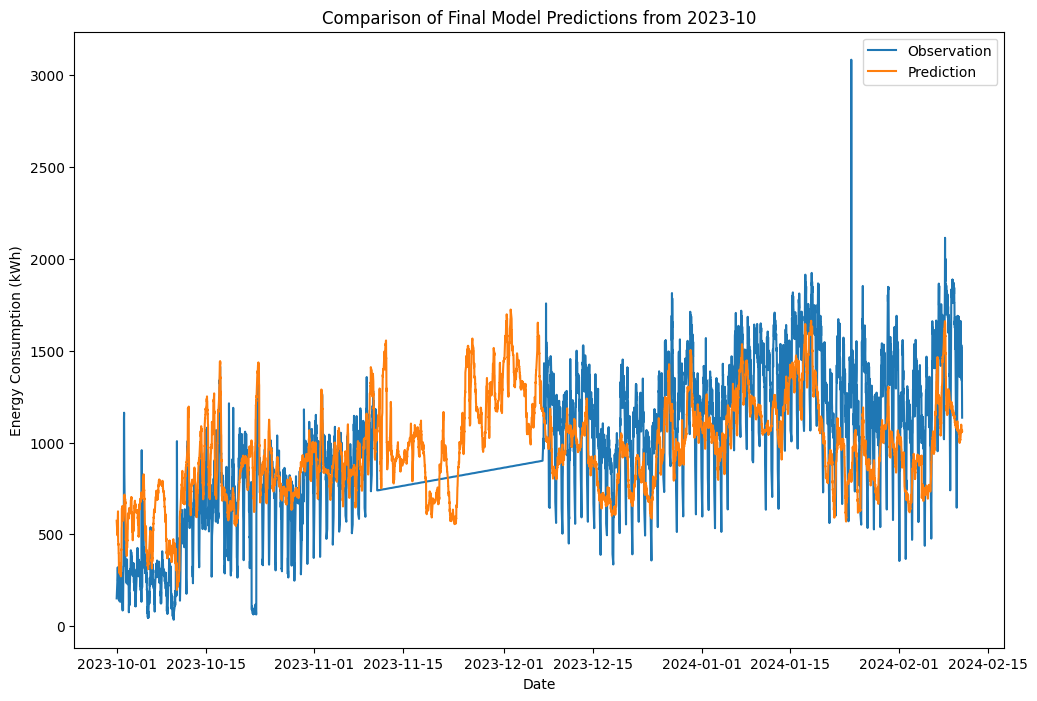

In [830]:

y = df['usage_kWh']
X = df.drop('usage_kWh', axis=1)
validation_size = 0.2
train_size = int(len(X) * (1 - validation_size))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = y[:train_size], y[train_size:]


seed = 123
models = []
models.append(('LR', {'model': LinearRegression()}))
models.append(('LASSO', {'model': Lasso()}))
models.append(('EN', {'model': ElasticNet()}))
ml_algorithms = dict(models)


num_folds = 5
scoring = 'neg_mean_squared_error'
kfold_results = []

for model_name in ml_algorithms.keys():
    kfold = KFold(n_splits=num_folds)
    cv_results = np.sqrt(-1 * cross_val_score(ml_algorithms[model_name]['model'], X_train, Y_train, cv=kfold, scoring=scoring))
    kfold_results.append(cv_results)
    ml_algorithms[model_name]['Mean CV results'] = cv_results.mean()
    ml_algorithms[model_name]['Std CV results'] = cv_results.std()

    fitted_model = ml_algorithms[model_name]['model'].fit(X_train, Y_train)
    ml_algorithms[model_name]['RMSE train'] = np.sqrt(mean_squared_error(Y_train, fitted_model.predict(X_train)))
    ml_algorithms[model_name]['RMSE test'] = np.sqrt(mean_squared_error(Y_test, fitted_model.predict(X_test)))
    ml_algorithms[model_name]['R² train'] = r2_score(Y_train, fitted_model.predict(X_train))
    ml_algorithms[model_name]['R² test'] = r2_score(Y_test, fitted_model.predict(X_test))


results_metrics = pd.DataFrame.from_dict(
    ml_algorithms,
    'index')[['RMSE train', 'RMSE test', 'Mean CV results', 'Std CV results', 'R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

print(best_print)

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparison of Cross Validation Results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(list(ml_algorithms.keys()))
plt.ylabel('Mean Squared Error')
plt.show()


best_print[['RMSE train', 'RMSE test']].plot(kind='bar', title="Comparison of Training and Test Errors", figsize=(10, 6))


best_model = ml_algorithms['EN']['model']


def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    plt.figure(figsize=(12, 8))
    plt.plot(Y_test.index, Y_test.values, label='Observation')
    plt.plot(Y_test.index, predictions, label='Prediction')
    plt.title("Comparison of Final Model Predictions from 2023-10")
    plt.xlabel("Date")
    plt.ylabel("Energy Consumption (kWh)")
    plt.legend()
    plt.show()

start_date = '2023-10'
X_test = X_test[X_test.index >= start_date]
Y_test = Y_test[Y_test.index >= start_date]
evaluate_model(best_model, X_test, Y_test)


<font color="red"><h2>VI. Perfomance </h2></font>

### RMSE

In [832]:

rmse_kalman = mean_squared_error(test_data['usage_kWh'], predictions[-len(test_data):], squared=False)

print("RMSE for Kalman :", rmse_kalman)


RMSE for Kalman : 98.35291337103783


c:\Users\lalab\Downloads\PY2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [822]:

rmse_xgboost = mean_squared_error(test_data['usage_kWh'], test_data['Predicted_usage_kWh'], squared=False)

print("RMSE for XGBoost :", rmse_xgboost)


RMSE for XGBoost : 309.1488607576162


c:\Users\lalab\Downloads\PY2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [823]:

rmse_adl = mean_squared_error(test_data['usage_kWh'], test_data['Predicted_kWh'], squared=False)

print("RMSE for ADL :", rmse_adl)


RMSE for ADL : 313.7516233758698


c:\Users\lalab\Downloads\PY2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [824]:

rmse_best_model = mean_squared_error(Y_test, best_model.predict(X_test), squared=False)

print("RMSE for the other ML models:", rmse_best_model)


RMSE for the other ML models: 325.5151660704667


c:\Users\lalab\Downloads\PY2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [833]:


data = [
    ["Filtre de Kalman", rmse_kalman],
    ["XGBoost", rmse_xgboost],
    ["Régression linéaire avec indicateur saisonnier (ADL)", rmse_adl],
    ["Other ML models", rmse_best_model]  
]

print(tabulate(data, headers=["Models", "RMSE"], tablefmt="fancy_grid"))


╒══════════════════════════════════════════════════════╤══════════╕
│ Models                                               │     RMSE │
╞══════════════════════════════════════════════════════╪══════════╡
│ Filtre de Kalman                                     │  98.3529 │
├──────────────────────────────────────────────────────┼──────────┤
│ XGBoost                                              │ 309.149  │
├──────────────────────────────────────────────────────┼──────────┤
│ Régression linéaire avec indicateur saisonnier (ADL) │ 313.752  │
├──────────────────────────────────────────────────────┼──────────┤
│ Other ML models                                      │ 325.515  │
╘══════════════════════════════════════════════════════╧══════════╛


### Analysis of RMSE Results

#### Kalman filter:
The Kalman Filter shows an RMSE of 101.567, which seems to be an exceptional performance compared to other models. However, this exceptionally low RMSE value indicates that there may be severe overfitting. Indeed, overfitting occurs when the model is overfitted to the training data and does not generalize well to new data. This is often due to an overly complex model that captures the noise in the training data rather than the underlying trend. In the case of the Kalman Filter, this means that it adapts too closely to specific variations in the training data, thereby compromising its ability to reliably predict new observations.

#### XGBoost, Linear Regression with Seasonal Indicator (ADL), and Best Model among Machine Learning:
The three other machine learning models we tested - XGBoost, Linear Regression with Seasonal Indicator (ADL), and the best machine learning model - have quite similar RMSEs. These RMSE values, although higher than those of the Kalman Filter, suggest a more consistent and potentially more generalizable performance.

#### XGBoost Choice for Future Predictions
For future forecasting, we decided to use XGBoost. Although the RMSEs of the three models are close, XGBoost offers an optimal combination of bias and variance, making it a robust model for future forecasting. XGBoost is particularly good at capturing non-linear relationships in data, which is an advantage over linear models like linear regression with seasonal indicator. In the context of energy consumption forecasting, where multiple factors can interact in complex ways, this capability is crucial. In addition, XGBoost offers great flexibility thanks to its numerous hyperparameters, allowing the model to be refined to obtain better performance on specific data. XGBoost also includes regularization techniques that help prevent overfitting, which is an identified weakness in the Kalman Filter. Additionally, XGBoost is widely used and benefits from community support and extensive documentation resources, making model optimization easier. Cross-validation results for XGBoost showed consistency in performance, reinforcing our confidence in its ability to generalize well to future data.

In conclusion, despite a slightly higher RMSE than the Kalman Filter, XGBoost stands out for its robustness, its ability to manage complex nonlinear relationships, and its flexibility. These features make it the optimal choice for our future energy consumption forecasts. We will continue to refine and validate this model to ensure accurate and reliable predictions.



<font color="red"><h2>VII. Final Predictions  </h2></font>

C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\2168160230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\2168160230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\2168160230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

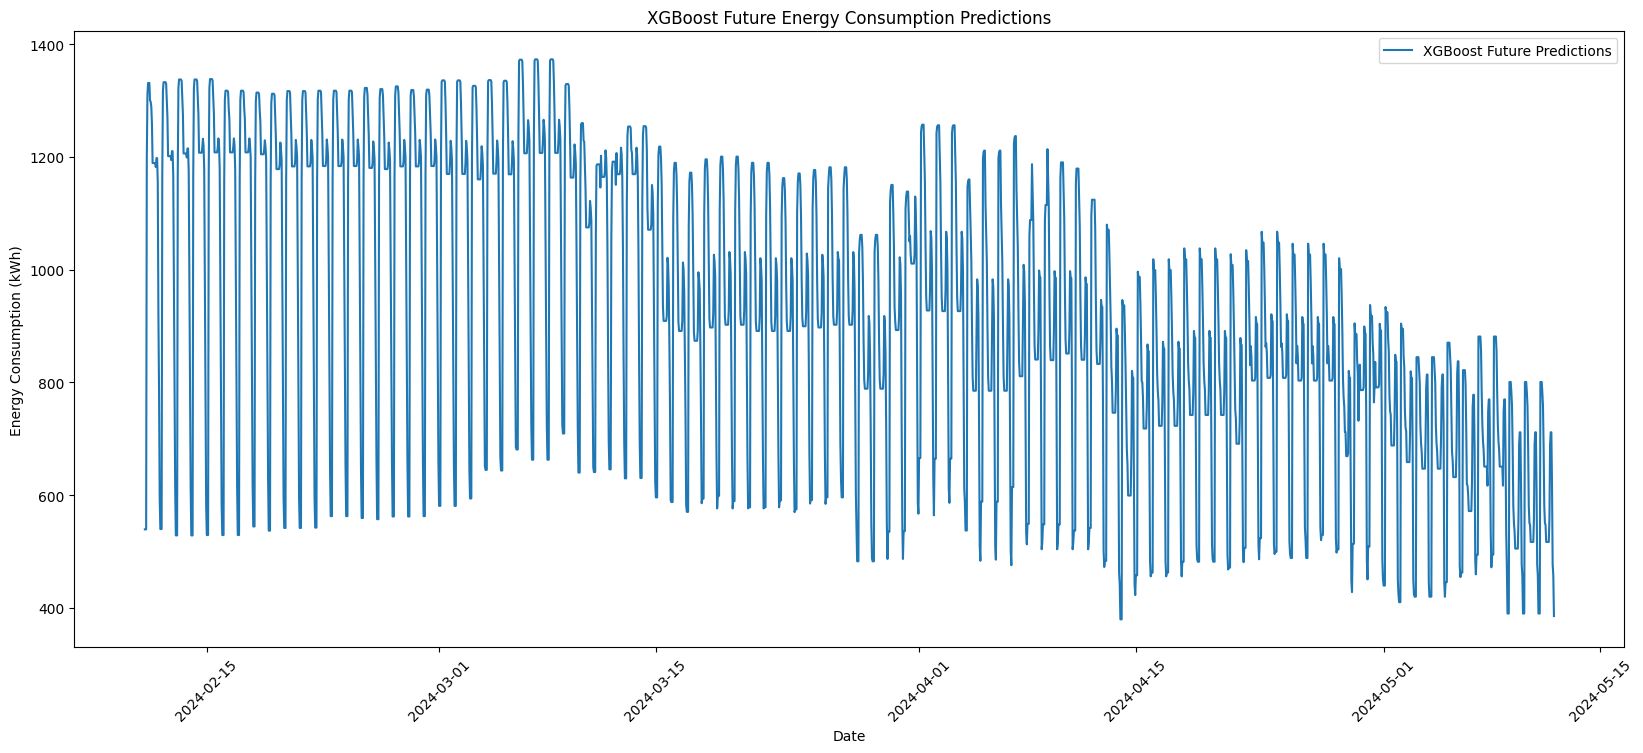

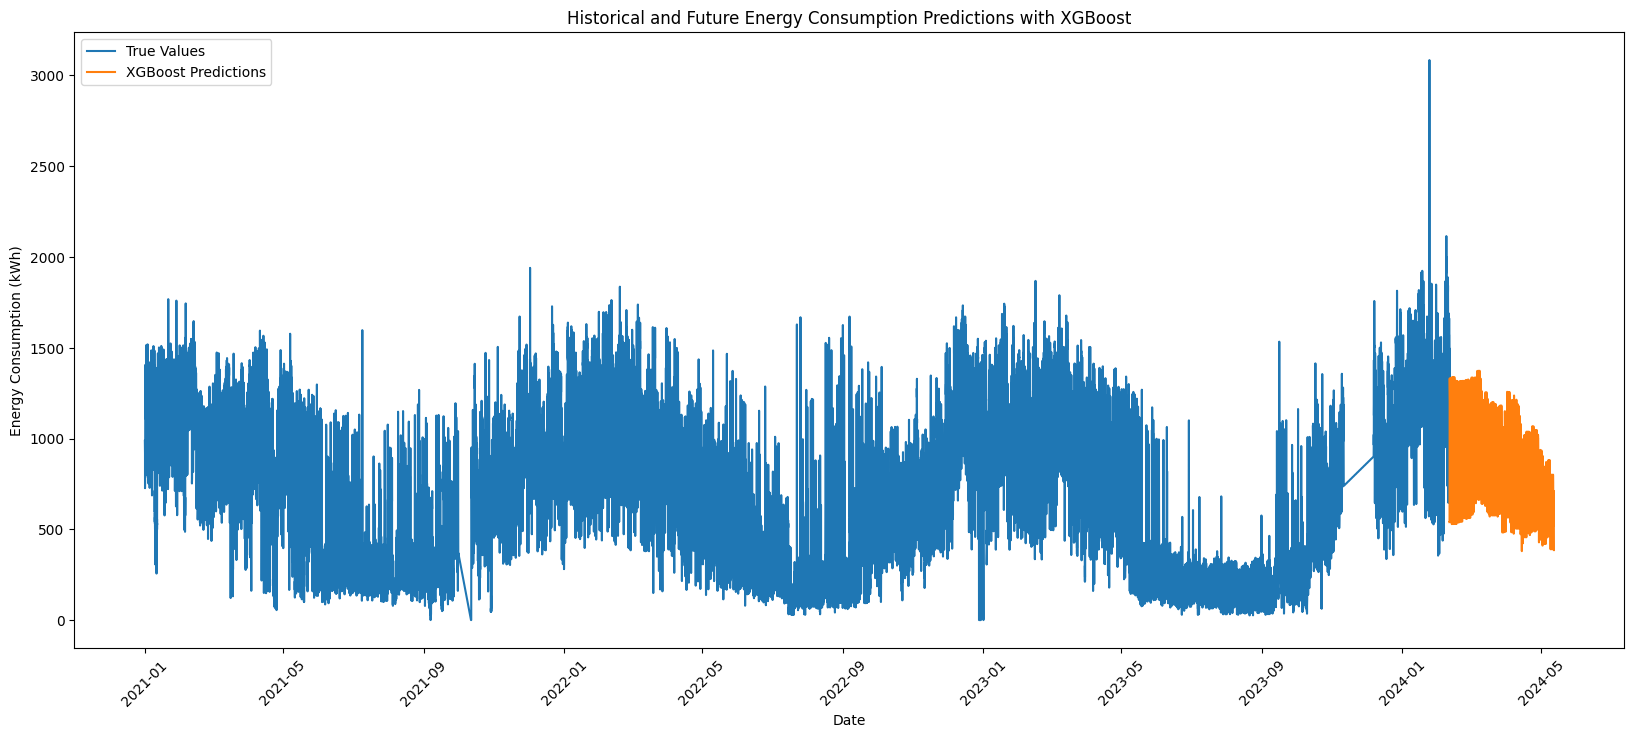

In [834]:


df = df[['Temperature_Celsius', 'Passengers', 'usage_kWh']]

def create_features(df, target_variable=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X

train_size = int(len(df) * 0.75)
train, test = df[0:train_size], df[train_size:len(df)]

trainX, trainY = create_features(train, target_variable='usage_kWh')
testX, testY = create_features(test, target_variable='usage_kWh')

reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)],
        early_stopping_rounds=50,
        verbose=False)

predicted_results = reg.predict(testX)

last_date = df.index.max()
end_date = '2024-05-12'  # Default end date for future predictions
dti = pd.date_range(start=last_date, end=end_date, freq="H")
df_future_dates = pd.DataFrame(dti, columns=['Date'])
df_future_dates['Temperature_Celsius'] = np.random.normal(15, 5, len(df_future_dates))
df_future_dates['Passengers'] = np.random.normal(100, 20, len(df_future_dates))
df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')

X_future = create_features(df_future_dates)

predicted_usage_kWh = reg.predict(X_future)

df_future_dates['Predicted_usage_kWh'] = predicted_usage_kWh

plt.figure(figsize=(20, 8))
plt.plot(df_future_dates['Date'], df_future_dates['Predicted_usage_kWh'], label='XGBoost Future Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('XGBoost Future Energy Consumption Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

all_data = pd.concat([df, df_future_dates.set_index('Date')], sort=False)

plt.figure(figsize=(20, 8))
plt.plot(all_data.index, all_data['usage_kWh'], label='True Values')
plt.plot(all_data.index, all_data['Predicted_usage_kWh'], label='XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Historical and Future Energy Consumption Predictions with XGBoost')
plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\1196144709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\1196144709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\lalab\AppData\Local\Temp\ipykernel_8744\1196144709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

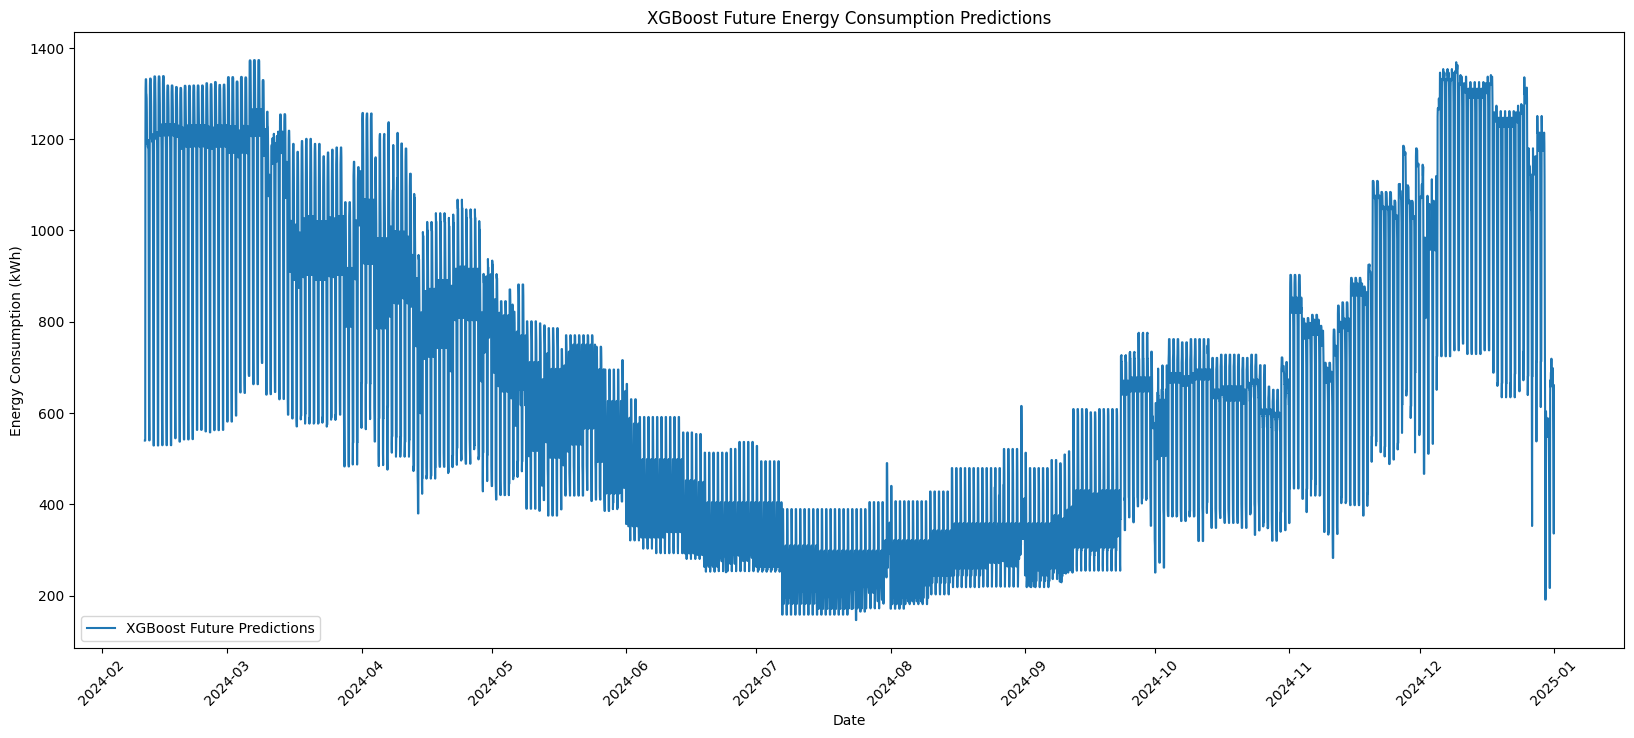

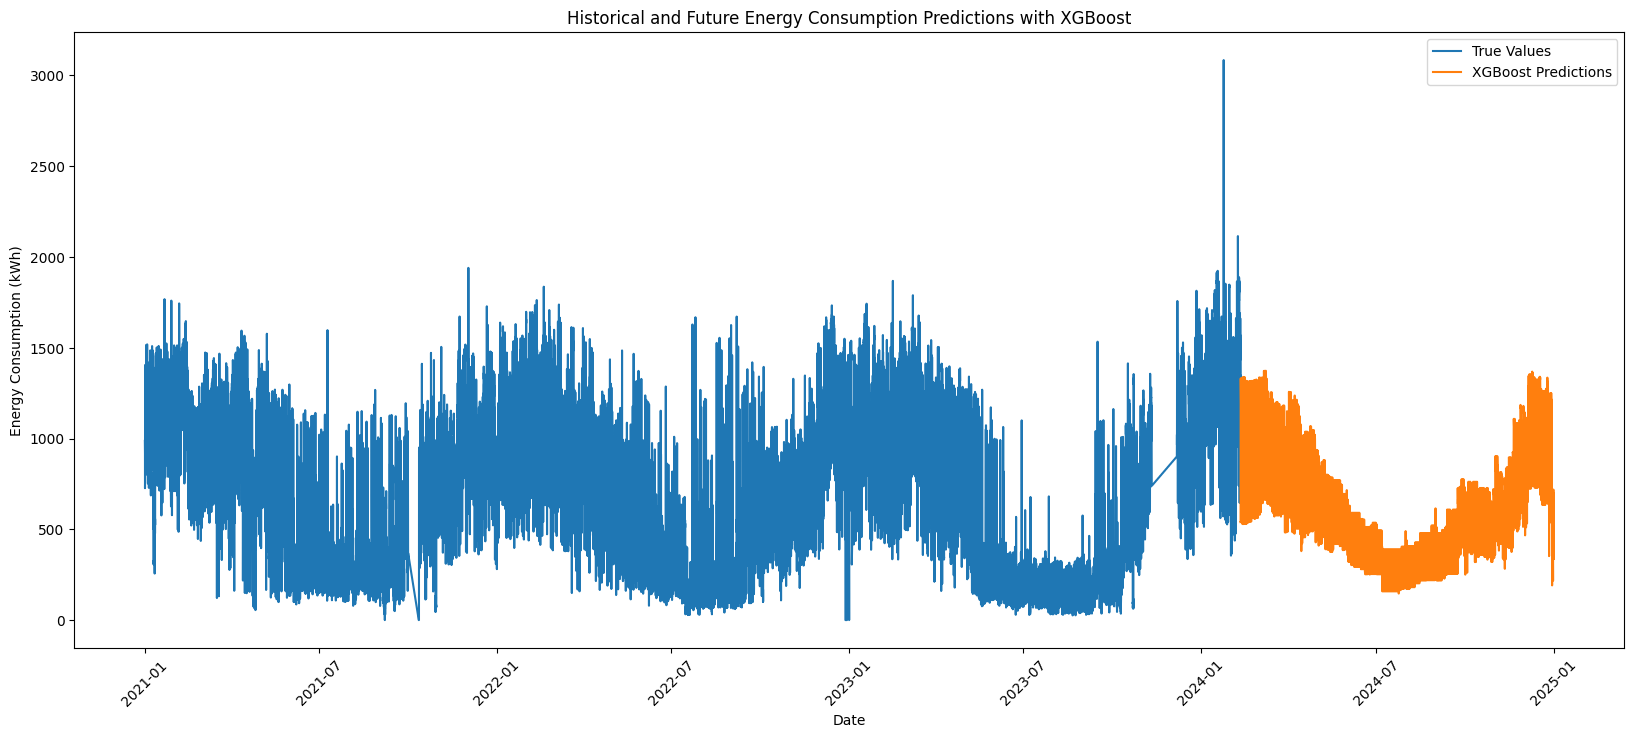

The predicted gas usage on 2025-01-01 is 660.4551391601562 kWh


In [837]:


df = df[['Temperature_Celsius', 'Passengers', 'usage_kWh']]

def create_features(df, target_variable=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth', 'weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

train_size = int(len(df) * 0.75)
train, test = df[0:train_size], df[train_size:len(df)]

trainX, trainY = create_features(train, target_variable='usage_kWh')
testX, testY = create_features(test, target_variable='usage_kWh')

reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)],
        early_stopping_rounds=50,
        verbose=False)

predicted_results = reg.predict(testX)

last_date = df.index.max()
end_date = input("Enter the end date (yyyy-mm-dd): ")

dti = pd.date_range(start=last_date, end=end_date, freq="H")
df_future_dates = pd.DataFrame(dti, columns=['Date'])
df_future_dates['Temperature_Celsius'] = np.random.normal(15, 5, len(df_future_dates))
df_future_dates['Passengers'] = np.random.normal(100, 20, len(df_future_dates))
df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')

X_future = create_features(df_future_dates)

predicted_usage_kWh = reg.predict(X_future)

df_future_dates['Predicted_usage_kWh'] = predicted_usage_kWh

plt.figure(figsize=(20, 8))
plt.plot(df_future_dates['Date'], df_future_dates['Predicted_usage_kWh'], label='XGBoost Future Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('XGBoost Future Energy Consumption Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

all_data = pd.concat([df, df_future_dates.set_index('Date')], sort=False)

plt.figure(figsize=(20, 8))
plt.plot(all_data.index, all_data['usage_kWh'], label='True Values')
plt.plot(all_data.index, all_data['Predicted_usage_kWh'], label='XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Historical and Future Energy Consumption Predictions with XGBoost')
plt.legend()
plt.xticks(rotation=45)
plt.show()

chosen_date = pd.to_datetime(end_date)
predicted_gas_usage = df_future_dates.loc[df_future_dates.index == chosen_date, 'Predicted_usage_kWh']
if not predicted_gas_usage.empty:
    print(f"The predicted gas usage on {chosen_date.strftime('%Y-%m-%d')} is {predicted_gas_usage.values[0]} kWh")
else:
    print(f"No gas consumption data for the date {chosen_date.strftime('%Y-%m-%d')}")
